In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data_train = pd.read_csv('loan_data_train.csv')
data_train

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0     79542.0            25000                      25000        18.49%   
1     75473.0            19750                      19750        17.27%   
2     67265.0             2100                       2100        14.33%   
3     80167.0            28000                      28000        16.29%   
4     17240.0            24250                   17431.82        12.23%   
...       ...              ...                        ...           ...   
2195  74047.0            30000                      30000        23.28%   
2196  63768.0             4200                       4200        14.33%   
2197  94545.0            19800                      19775        15.31%   
2198  53635.0            18000                      18000        20.99%   
2199  67953.0             7550                       7550        10.16%   

     Loan.Length        Loan.Purpose Debt.To.Income.Ratio State  \
0      60 months  debt_consolidation               27.56%    VA   
1      60 months  debt_consolidation               13.39%    NY   
2      36 months      major_purchase                3.50%    LA   
3      36 months         credit_card               19.62%    NV   
4      60 months         credit_card               23.79%    OH   
...          ...                 ...                  ...   ...   
2195   60 months               other               12.10%    IL   
2196   60 months                 car               14.16%    NJ   
2197   60 months  debt_consolidation               15.03%    IL   
2198   60 months         credit_card               11.63%    CA   
2199   36 months  debt_consolidation                3.83%    CA   

     Home.Ownership  Monthly.Income FICO.Range Open.CREDIT.Lines  \
0          MORTGAGE         8606.56    720-724                11   
1          MORTGAGE         6737.50    710-714                14   
2               OWN         1000.00    690-694                13   
3          MORTGAGE         7083.33    710-714                12   
4          MORTGAGE         5833.33    730-734                 6   
...             ...             ...        ...               ...   
2195       MORTGAGE         7083.33    675-679                16   
2196           RENT         3850.00    700-704                 4   
2197       MORTGAGE         6666.67    675-679                10   
2198           RENT         9051.83    670-674                 5   
2199       MORTGAGE         8333.33    710-714                10   

     Revolving.CREDIT.Balance  Inquiries.in.the.Last.6.Months  \
0                       15210                             3.0   
1                       19070                             3.0   
2                         893                             1.0   
3                       38194                             1.0   
4                       31061                             2.0   
...                       ...                             ...   
2195                    17969                             1.0   
2196                     5718                             0.0   
2197                    46879                             3.0   
2198                    32394                             2.0   
2199                    10204                             0.0   

     Employment.Length  
0              5 years  
1              4 years  
2             < 1 year  
3            10+ years  
4            10+ years  
...                ...  
2195         10+ years  
2196           2 years  
2197           6 years  
2198           4 years  
2199           2 years  

[2200 rows x 15 columns]

In [3]:
data_test = pd.read_csv('loan_data_test.csv')
data_test

ID  Amount.Requested Amount.Funded.By.Investors Loan.Length  \
0    20093              5000                       5000   60 months   
1    62445             18000                      18000   60 months   
2    65248              7200                       7200   60 months   
3    81822              7200                       7200   36 months   
4    57923             22000                      22000   60 months   
..     ...               ...                        ...         ...   
295  24675             12000                      11975   60 months   
296  69456              5000                       5000   36 months   
297  97954              4375                       4375   36 months   
298  36931             13600                      13600   60 months   
299  34744              6000                       6000   36 months   

           Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0                moving               12.59%    NY           RENT   
1    debt_consolidation                4.93%    CA           RENT   
2    debt_consolidation               25.16%    LA       MORTGAGE   
3    debt_consolidation               17.27%    NY       MORTGAGE   
4    debt_consolidation               18.28%    MI       MORTGAGE   
..                  ...                  ...   ...            ...   
295    home_improvement               13.91%    NV       MORTGAGE   
296  debt_consolidation               17.22%    CA            OWN   
297         credit_card                9.09%    CA           RENT   
298         credit_card               12.85%    MN           RENT   
299  debt_consolidation                7.64%    IL       MORTGAGE   

     Monthly.Income FICO.Range Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0           4416.67    690-694                13                      7686   
1           5258.50    710-714                 6                     11596   
2           3750.00    750-754                13                      7283   
3           3416.67    790-794                14                      4838   
4           6083.33    720-724                 9                     20181   
..              ...        ...               ...                       ...   
295         7083.33    705-709                 7                      3923   
296         4000.00    705-709                10                      6023   
297         2916.67    670-674                 9                      6944   
298         5651.33    675-679                13                     24383   
299         5184.75    675-679                 8                     14422   

     Inquiries.in.the.Last.6.Months Employment.Length  
0                                 0          < 1 year  
1                                 0         10+ years  
2                                 0           6 years  
3                                 0         10+ years  
4                                 0           8 years  
..                              ...               ...  
295                               2           7 years  
296                               0         10+ years  
297                               2           6 years  
298                               0         10+ years  
299                               0           2 years  

[300 rows x 14 columns]

In [4]:
data_test['Interest.Rate'] = 'testdata'
data_test.head()

ID  Amount.Requested Amount.Funded.By.Investors Loan.Length  \
0  20093              5000                       5000   60 months   
1  62445             18000                      18000   60 months   
2  65248              7200                       7200   60 months   
3  81822              7200                       7200   36 months   
4  57923             22000                      22000   60 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0              moving               12.59%    NY           RENT   
1  debt_consolidation                4.93%    CA           RENT   
2  debt_consolidation               25.16%    LA       MORTGAGE   
3  debt_consolidation               17.27%    NY       MORTGAGE   
4  debt_consolidation               18.28%    MI       MORTGAGE   

   Monthly.Income FICO.Range Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         4416.67    690-694                13                      7686   
1         5258.50    710-714                 6                     11596   
2         3750.00    750-754                13                      7283   
3         3416.67    790-794                14                      4838   
4         6083.33    720-724                 9                     20181   

   Inquiries.in.the.Last.6.Months Employment.Length Interest.Rate  
0                               0          < 1 year      testdata  
1                               0         10+ years      testdata  
2                               0           6 years      testdata  
3                               0         10+ years      testdata  
4                               0           8 years      testdata

In [5]:
all_data = pd.concat((data_train,data_test))
all_data

ID Amount.Requested Amount.Funded.By.Investors Interest.Rate  \
0    79542.0            25000                      25000        18.49%   
1    75473.0            19750                      19750        17.27%   
2    67265.0             2100                       2100        14.33%   
3    80167.0            28000                      28000        16.29%   
4    17240.0            24250                   17431.82        12.23%   
..       ...              ...                        ...           ...   
295  24675.0            12000                      11975      testdata   
296  69456.0             5000                       5000      testdata   
297  97954.0             4375                       4375      testdata   
298  36931.0            13600                      13600      testdata   
299  34744.0             6000                       6000      testdata   

    Loan.Length        Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0     60 months  debt_consolidation               27.56%    VA       MORTGAGE   
1     60 months  debt_consolidation               13.39%    NY       MORTGAGE   
2     36 months      major_purchase                3.50%    LA            OWN   
3     36 months         credit_card               19.62%    NV       MORTGAGE   
4     60 months         credit_card               23.79%    OH       MORTGAGE   
..          ...                 ...                  ...   ...            ...   
295   60 months    home_improvement               13.91%    NV       MORTGAGE   
296   36 months  debt_consolidation               17.22%    CA            OWN   
297   36 months         credit_card                9.09%    CA           RENT   
298   60 months         credit_card               12.85%    MN           RENT   
299   36 months  debt_consolidation                7.64%    IL       MORTGAGE   

     Monthly.Income FICO.Range Open.CREDIT.Lines Revolving.CREDIT.Balance  \
0           8606.56    720-724                11                    15210   
1           6737.50    710-714                14                    19070   
2           1000.00    690-694                13                      893   
3           7083.33    710-714                12                    38194   
4           5833.33    730-734                 6                    31061   
..              ...        ...               ...                      ...   
295         7083.33    705-709                 7                     3923   
296         4000.00    705-709                10                     6023   
297         2916.67    670-674                 9                     6944   
298         5651.33    675-679                13                    24383   
299         5184.75    675-679                 8                    14422   

     Inquiries.in.the.Last.6.Months Employment.Length  
0                               3.0           5 years  
1                               3.0           4 years  
2                               1.0          < 1 year  
3                               1.0         10+ years  
4                               2.0         10+ years  
..                              ...               ...  
295                             2.0           7 years  
296                             0.0         10+ years  
297                             2.0           6 years  
298                             0.0         10+ years  
299                             0.0           2 years  

[2500 rows x 15 columns]

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2499 non-null   object 
 2   Amount.Funded.By.Investors      2499 non-null   object 
 3   Interest.Rate                   2500 non-null   object 
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2499 non-null   object 
 7   State                           2499 non-null   object 
 8   Home.Ownership                  2499 non-null   object 
 9   Monthly.Income                  2497 non-null   float64
 10  FICO.Range                      2500 non-null   object 
 11  Open.CREDIT.Lines               2496 non-null   object 
 12  Revolving.CREDIT.Balance        2497 non

## Replacing '.' with '_' in column names

In [7]:
all_data.columns = all_data.columns.str.replace('.','_')

all_data.head(2)

ID Amount_Requested Amount_Funded_By_Investors Interest_Rate  \
0  79542.0            25000                      25000        18.49%   
1  75473.0            19750                      19750        17.27%   

  Loan_Length        Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
0   60 months  debt_consolidation               27.56%    VA       MORTGAGE   
1   60 months  debt_consolidation               13.39%    NY       MORTGAGE   

   Monthly_Income FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
0         8606.56    720-724                11                    15210   
1         6737.50    710-714                14                    19070   

   Inquiries_in_the_Last_6_Months Employment_Length  
0                             3.0           5 years  
1                             3.0           4 years

In [8]:
all_data = all_data.drop(['ID'], axis=1)

In [9]:
all_data.head(2)

Amount_Requested Amount_Funded_By_Investors Interest_Rate Loan_Length  \
0            25000                      25000        18.49%   60 months   
1            19750                      19750        17.27%   60 months   

         Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
0  debt_consolidation               27.56%    VA       MORTGAGE   
1  debt_consolidation               13.39%    NY       MORTGAGE   

   Monthly_Income FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
0         8606.56    720-724                11                    15210   
1         6737.50    710-714                14                    19070   

   Inquiries_in_the_Last_6_Months Employment_Length  
0                             3.0           5 years  
1                             3.0           4 years

### Removing garbage values and transforming dtypes of features as necessary

#### Amount_Requested

In [10]:
all_data[all_data['Amount_Requested'] == '.']

Amount_Requested Amount_Funded_By_Investors Interest_Rate Loan_Length  \
371                 .                       1850        12.49%   36 months   
1357                .                      12000        10.16%   36 months   
1791                .                      15875        14.33%   36 months   
1991                .                       7000         6.91%   36 months   

            Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
371     home_improvement               20.56%    MD       MORTGAGE   
1357  debt_consolidation               27.48%    VA       MORTGAGE   
1791      small_business               17.44%    MD       MORTGAGE   
1991         credit_card                7.10%    CA           RENT   

      Monthly_Income FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
371          3448.33    660-664                10                    18749   
1357         5000.00    710-714                12                    10490   
1791         3416.67    675-679                11                    15891   
1991         5000.00    715-719                 8                     7612   

      Inquiries_in_the_Last_6_Months Employment_Length  
371                              5.0          < 1 year  
1357                             0.0           7 years  
1791                             0.0           2 years  
1991                             0.0           3 years

In [11]:
all_data['Amount_Requested'] = np.where(all_data['Amount_Requested']=='.',np.nan, all_data['Amount_Requested'])

In [12]:
all_data['Amount_Requested'].isna().sum()

5

In [13]:
all_data['Amount_Requested'] = all_data['Amount_Requested'].astype(float)

#### Amount_Funded_By_Investors

In [14]:
all_data[all_data['Amount_Funded_By_Investors']=='.']

Amount_Requested Amount_Funded_By_Investors Interest_Rate Loan_Length  \
110             3000.0                          .        17.44%   36 months   
1091            1000.0                          .        13.16%   36 months   
1983            3000.0                          .         8.59%   36 months   
5               6000.0                          .      testdata   36 months   

          Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
110              other               15.79%    MD           RENT   
1091             other               19.63%    MI           RENT   
1983             other                3.72%    MA       MORTGAGE   
5     home_improvement                2.52%    NJ       MORTGAGE   

      Monthly_Income FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
110           7952.0    660-664                 4                    12578   
1091          3500.0    670-674                 9                    11189   
1983          4167.0    765-769                 4                     7074   
5             4800.0    750-754                 .                     1442   

      Inquiries_in_the_Last_6_Months Employment_Length  
110                              0.0           8 years  
1091                             2.0           2 years  
1983                             0.0           5 years  
5                                0.0         10+ years

In [15]:
all_data['Amount_Funded_By_Investors'] = np.where(all_data['Amount_Funded_By_Investors']=='.',np.nan, all_data['Amount_Funded_By_Investors'])

In [16]:
all_data['Amount_Funded_By_Investors'].isna().sum()

5

In [17]:
all_data['Amount_Funded_By_Investors'] = all_data['Amount_Funded_By_Investors'].astype(float)

#### Loan_Length

In [18]:
all_data[all_data['Loan_Length'] == '.']

Amount_Requested  Amount_Funded_By_Investors Interest_Rate Loan_Length  \
1218           13500.0                     13500.0        14.33%           .   

            Loan_Purpose Debt_To_Income_Ratio State Home_Ownership  \
1218  debt_consolidation               31.70%    WV           RENT   

      Monthly_Income FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
1218         4166.67    680-684                11                    31168   

      Inquiries_in_the_Last_6_Months Employment_Length  
1218                             0.0            1 year

In [19]:
all_data['Loan_Length'] = np.where(all_data['Loan_Length']=='.',np.nan, all_data['Loan_Length'])

In [20]:
all_data['Loan_Length'].isnull().sum()

2

In [21]:
all_data['Loan_Length'] = all_data['Loan_Length'].str.replace(r'[a-zA-Z ]','', regex=True)

all_data['Loan_Length'] = all_data['Loan_Length'].astype(float)

#### Debt_To_Income_Ratio

In [22]:
all_data[all_data['Debt_To_Income_Ratio']=='.']

Empty DataFrame
Columns: [Amount_Requested, Amount_Funded_By_Investors, Interest_Rate, Loan_Length, Loan_Purpose, Debt_To_Income_Ratio, State, Home_Ownership, Monthly_Income, FICO_Range, Open_CREDIT_Lines, Revolving_CREDIT_Balance, Inquiries_in_the_Last_6_Months, Employment_Length]
Index: []

In [23]:
all_data['Debt_To_Income_Ratio'] = all_data['Debt_To_Income_Ratio'].str.replace('%','', regex=True)

all_data['Debt_To_Income_Ratio'] = all_data['Debt_To_Income_Ratio'].astype(float)

#### FICO_Range

In [24]:
fico_range = all_data['FICO_Range'].str.split('-', expand=True)

fico_range.columns = ['min','max']
fico_range

min  max
0    720  724
1    710  714
2    690  694
3    710  714
4    730  734
..   ...  ...
295  705  709
296  705  709
297  670  674
298  675  679
299  675  679

[2500 rows x 2 columns]

In [25]:
fico_range['min'] = fico_range['min'].astype(int)

fico_range['max'] = fico_range['max'].astype(int)

In [26]:
all_data['FICO_Range'] = (fico_range['min']+fico_range['max'])/2

In [27]:
all_data.head()

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0           25000.0                    25000.00        18.49%         60.0   
1           19750.0                    19750.00        17.27%         60.0   
2            2100.0                     2100.00        14.33%         36.0   
3           28000.0                    28000.00        16.29%         36.0   
4           24250.0                    17431.82        12.23%         60.0   

         Loan_Purpose  Debt_To_Income_Ratio State Home_Ownership  \
0  debt_consolidation                 27.56    VA       MORTGAGE   
1  debt_consolidation                 13.39    NY       MORTGAGE   
2      major_purchase                  3.50    LA            OWN   
3         credit_card                 19.62    NV       MORTGAGE   
4         credit_card                 23.79    OH       MORTGAGE   

   Monthly_Income  FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
0         8606.56       722.0                11                    15210   
1         6737.50       712.0                14                    19070   
2         1000.00       692.0                13                      893   
3         7083.33       712.0                12                    38194   
4         5833.33       732.0                 6                    31061   

   Inquiries_in_the_Last_6_Months Employment_Length  
0                             3.0           5 years  
1                             3.0           4 years  
2                             1.0          < 1 year  
3                             1.0         10+ years  
4                             2.0         10+ years

#### Open_CREDIT_Lines

In [28]:
all_data[all_data['Open_CREDIT_Lines'] == '.']

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
98             34500.0                     34450.0         6.62%         36.0   
1383            9050.0                      9050.0        13.11%         36.0   
1907            3000.0                      2975.0         7.90%         36.0   
5               6000.0                         NaN      testdata         36.0   
135             8000.0                      8000.0      testdata         36.0   

            Loan_Purpose  Debt_To_Income_Ratio State Home_Ownership  \
98        small_business                 16.46    CA       MORTGAGE   
1383         credit_card                 20.58    MI       MORTGAGE   
1907      major_purchase                 17.58    LA           RENT   
5       home_improvement                  2.52    NJ       MORTGAGE   
135   debt_consolidation                 15.46    CA       MORTGAGE   

      Monthly_Income  FICO_Range Open_CREDIT_Lines Revolving_CREDIT_Balance  \
98          10000.00       807.0                 .                     5317   
1383         5166.67       702.0                 .                     7571   
1907         3458.33       722.0                 .                     2999   
5            4800.00       752.0                 .                     1442   
135          2916.67       677.0                 .                     7152   

      Inquiries_in_the_Last_6_Months Employment_Length  
98                               0.0           9 years  
1383                             1.0           7 years  
1907                             0.0            1 year  
5                                0.0         10+ years  
135                              1.0           5 years

In [29]:
all_data['Open_CREDIT_Lines'] = np.where(all_data['Open_CREDIT_Lines']=='.',np.nan, all_data['Open_CREDIT_Lines'])

In [30]:
all_data['Open_CREDIT_Lines'].isna().sum()

9

In [31]:
all_data['Open_CREDIT_Lines'] = all_data['Open_CREDIT_Lines'].astype(float)

#### Revolving_CREDIT_Balance

In [32]:
all_data[all_data['Revolving_CREDIT_Balance'] == '.']

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
1374            6000.0                      6000.0        12.42%         36.0   
1740            8000.0                      8000.0        14.09%         36.0   

          Loan_Purpose  Debt_To_Income_Ratio State Home_Ownership  \
1374    major_purchase                 16.66    NJ           RENT   
1740  home_improvement                 12.06    HI           RENT   

      Monthly_Income  FICO_Range  Open_CREDIT_Lines Revolving_CREDIT_Balance  \
1374          3500.0       677.0                8.0                        .   
1740          5000.0       697.0               10.0                        .   

      Inquiries_in_the_Last_6_Months Employment_Length  
1374                             0.0           5 years  
1740                             1.0           6 years

In [33]:
all_data['Revolving_CREDIT_Balance'] = np.where(all_data['Revolving_CREDIT_Balance']=='.',np.nan, all_data['Revolving_CREDIT_Balance'])

all_data['Revolving_CREDIT_Balance'] = all_data['Revolving_CREDIT_Balance'].astype(float)

#### Employment_Length

In [34]:
all_data['Employment_Length'] = all_data['Employment_Length'].str.replace(r'[a-zA-Z ]','', regex=True)

all_data['Employment_Length'] = np.where(all_data['Employment_Length']=='<1',0.5, 
                                         np.where(all_data['Employment_Length']=='10+',15, 
                                                  np.where(all_data['Employment_Length']=='.',np.nan, all_data['Employment_Length'])))

all_data['Employment_Length'] = all_data['Employment_Length'].astype(float)

#### Interest_Rate

In [35]:
all_data['Interest_Rate'] = all_data['Interest_Rate'].str.replace('%','', regex=True)

In [36]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2495 non-null   float64
 1   Amount_Funded_By_Investors      2495 non-null   float64
 2   Interest_Rate                   2500 non-null   object 
 3   Loan_Length                     2498 non-null   float64
 4   Loan_Purpose                    2499 non-null   object 
 5   Debt_To_Income_Ratio            2499 non-null   float64
 6   State                           2499 non-null   object 
 7   Home_Ownership                  2499 non-null   object 
 8   Monthly_Income                  2497 non-null   float64
 9   FICO_Range                      2500 non-null   float64
 10  Open_CREDIT_Lines               2491 non-null   float64
 11  Revolving_CREDIT_Balance        2495 non-null   float64
 12  Inquiries_in_the_Last_6_Months  2497 non

In [37]:
all_data

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0             25000.0                    25000.00         18.49         60.0   
1             19750.0                    19750.00         17.27         60.0   
2              2100.0                     2100.00         14.33         36.0   
3             28000.0                    28000.00         16.29         36.0   
4             24250.0                    17431.82         12.23         60.0   
..                ...                         ...           ...          ...   
295           12000.0                    11975.00      testdata         60.0   
296            5000.0                     5000.00      testdata         36.0   
297            4375.0                     4375.00      testdata         36.0   
298           13600.0                    13600.00      testdata         60.0   
299            6000.0                     6000.00      testdata         36.0   

           Loan_Purpose  Debt_To_Income_Ratio State Home_Ownership  \
0    debt_consolidation                 27.56    VA       MORTGAGE   
1    debt_consolidation                 13.39    NY       MORTGAGE   
2        major_purchase                  3.50    LA            OWN   
3           credit_card                 19.62    NV       MORTGAGE   
4           credit_card                 23.79    OH       MORTGAGE   
..                  ...                   ...   ...            ...   
295    home_improvement                 13.91    NV       MORTGAGE   
296  debt_consolidation                 17.22    CA            OWN   
297         credit_card                  9.09    CA           RENT   
298         credit_card                 12.85    MN           RENT   
299  debt_consolidation                  7.64    IL       MORTGAGE   

     Monthly_Income  FICO_Range  Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0           8606.56       722.0               11.0                   15210.0   
1           6737.50       712.0               14.0                   19070.0   
2           1000.00       692.0               13.0                     893.0   
3           7083.33       712.0               12.0                   38194.0   
4           5833.33       732.0                6.0                   31061.0   
..              ...         ...                ...                       ...   
295         7083.33       707.0                7.0                    3923.0   
296         4000.00       707.0               10.0                    6023.0   
297         2916.67       672.0                9.0                    6944.0   
298         5651.33       677.0               13.0                   24383.0   
299         5184.75       677.0                8.0                   14422.0   

     Inquiries_in_the_Last_6_Months  Employment_Length  
0                               3.0                5.0  
1                               3.0                4.0  
2                               1.0                0.5  
3                               1.0               15.0  
4                               2.0               15.0  
..                              ...                ...  
295                             2.0                7.0  
296                             0.0               15.0  
297                             2.0                6.0  
298                             0.0               15.0  
299                             0.0                2.0  

[2500 rows x 14 columns]

## Handling Missing Values

In [38]:
all_data.isna().sum()/len(all_data)*100

Amount_Requested                  0.20
Amount_Funded_By_Investors        0.20
Interest_Rate                     0.00
Loan_Length                       0.08
Loan_Purpose                      0.04
Debt_To_Income_Ratio              0.04
State                             0.04
Home_Ownership                    0.04
Monthly_Income                    0.12
FICO_Range                        0.00
Open_CREDIT_Lines                 0.36
Revolving_CREDIT_Balance          0.20
Inquiries_in_the_Last_6_Months    0.12
Employment_Length                 3.20
dtype: float64

In [39]:
all_data = all_data.dropna()

all_data.shape

(2392, 14)

In [40]:
data = all_data.copy()

## Outliers check

In [41]:
columns_numeric=[]
for i in data.columns:
    if data[i].dtype != object and data[i].nunique() > 5:
        columns_numeric.append(i)
columns_numeric

['Amount_Requested',
 'Amount_Funded_By_Investors',
 'Debt_To_Income_Ratio',
 'Monthly_Income',
 'FICO_Range',
 'Open_CREDIT_Lines',
 'Revolving_CREDIT_Balance',
 'Inquiries_in_the_Last_6_Months',
 'Employment_Length']

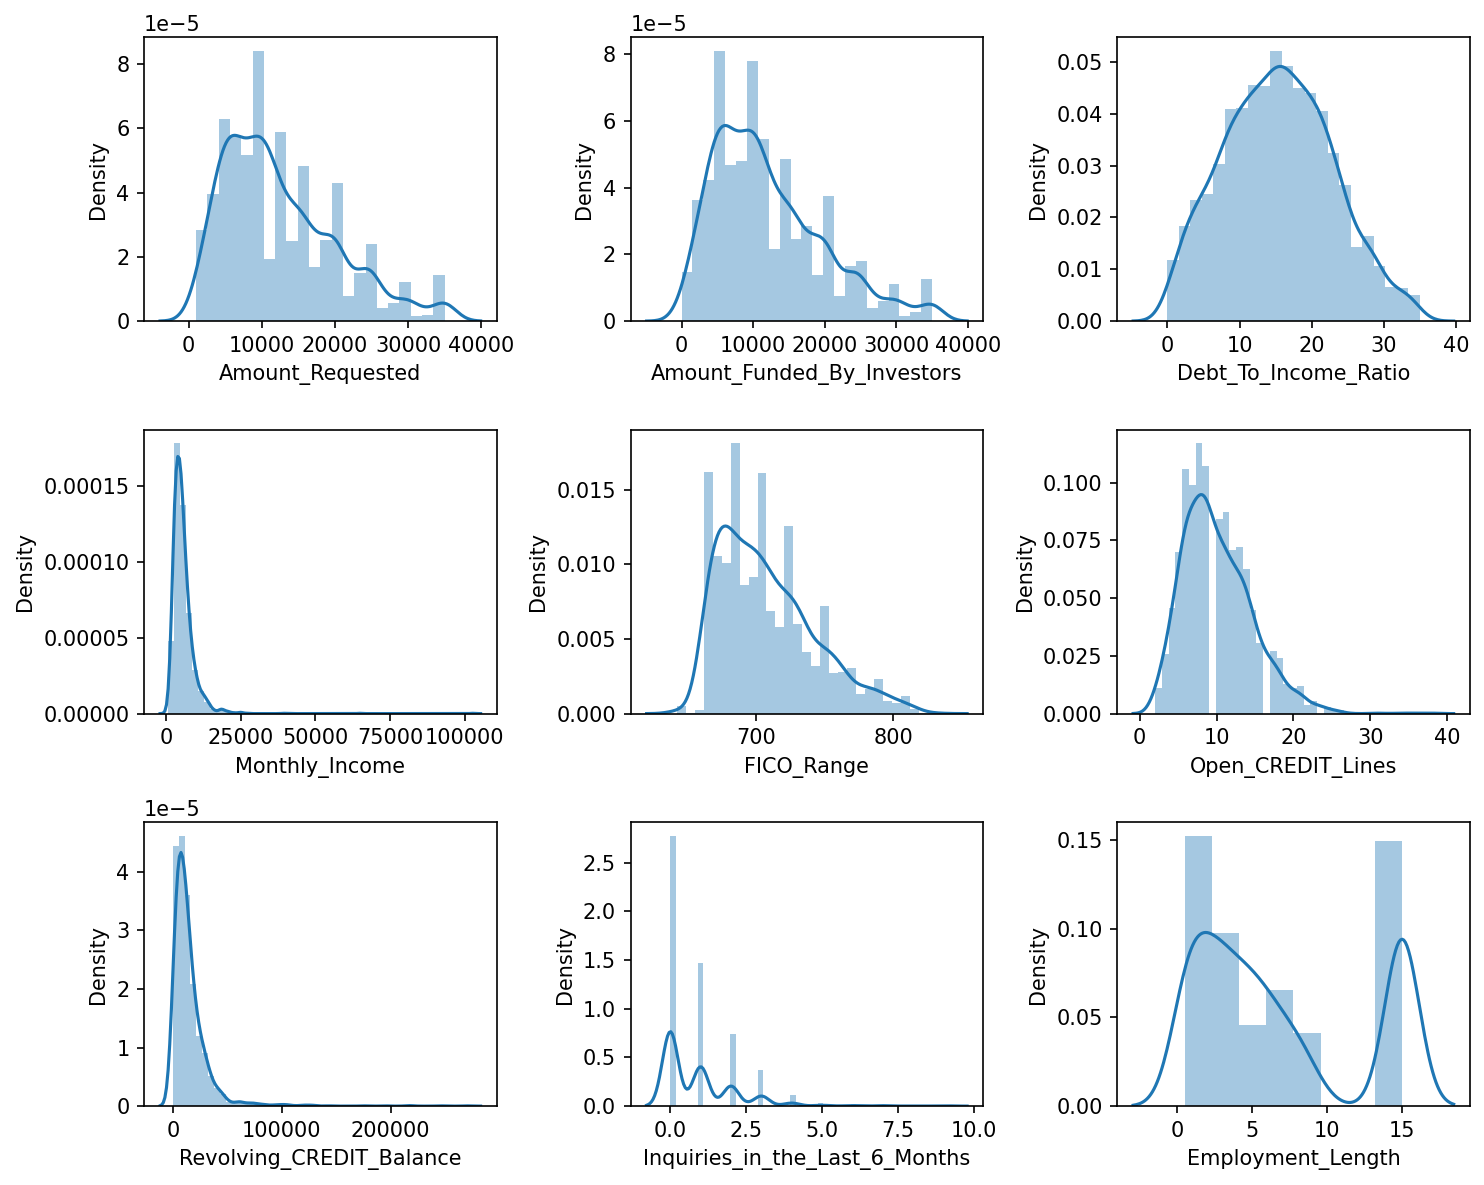

In [42]:
plt.figure(figsize=(10,8),dpi=150)
axes = 1
for col in columns_numeric:
    plt.subplot(3,3,axes)
    sns.distplot(data[col])
    axes+=1
plt.tight_layout()
plt.show()

* Features roughly normally distributed.

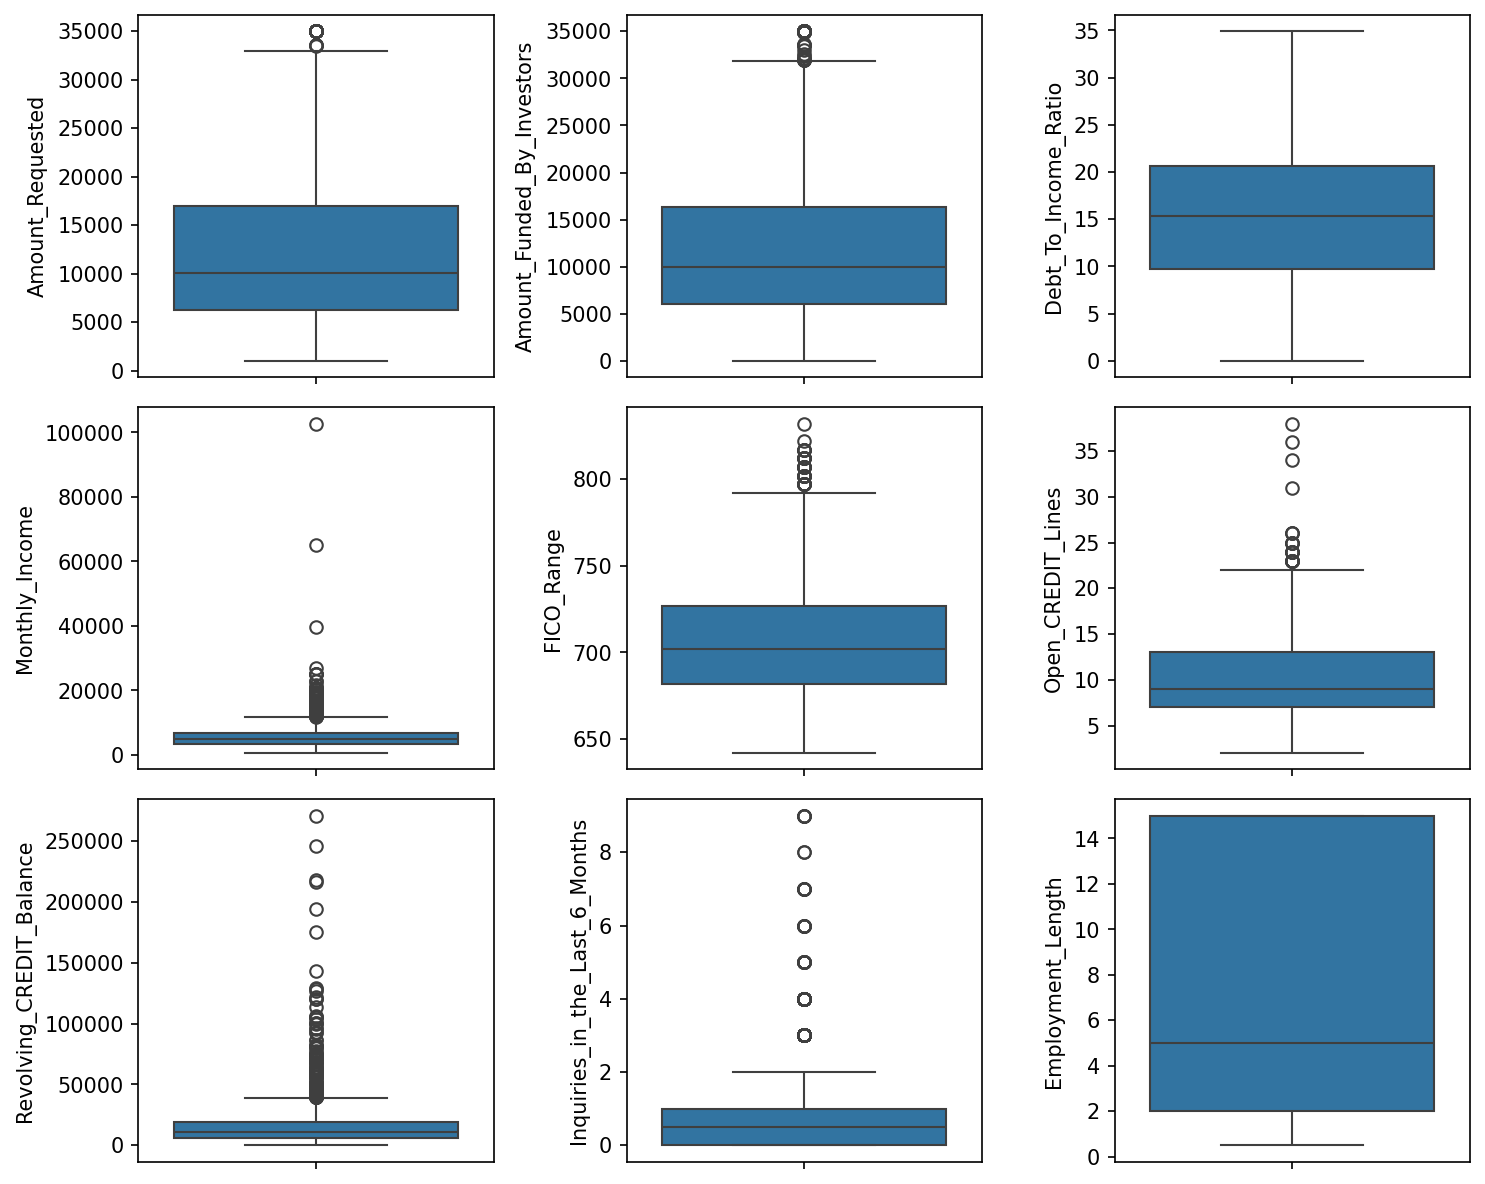

In [43]:
plt.figure(figsize=(10,8),dpi=150)
axes = 1
for col in columns_numeric:
    plt.subplot(3,3,axes)
    sns.boxplot(data[col])
    axes+=1
plt.tight_layout()
plt.show()

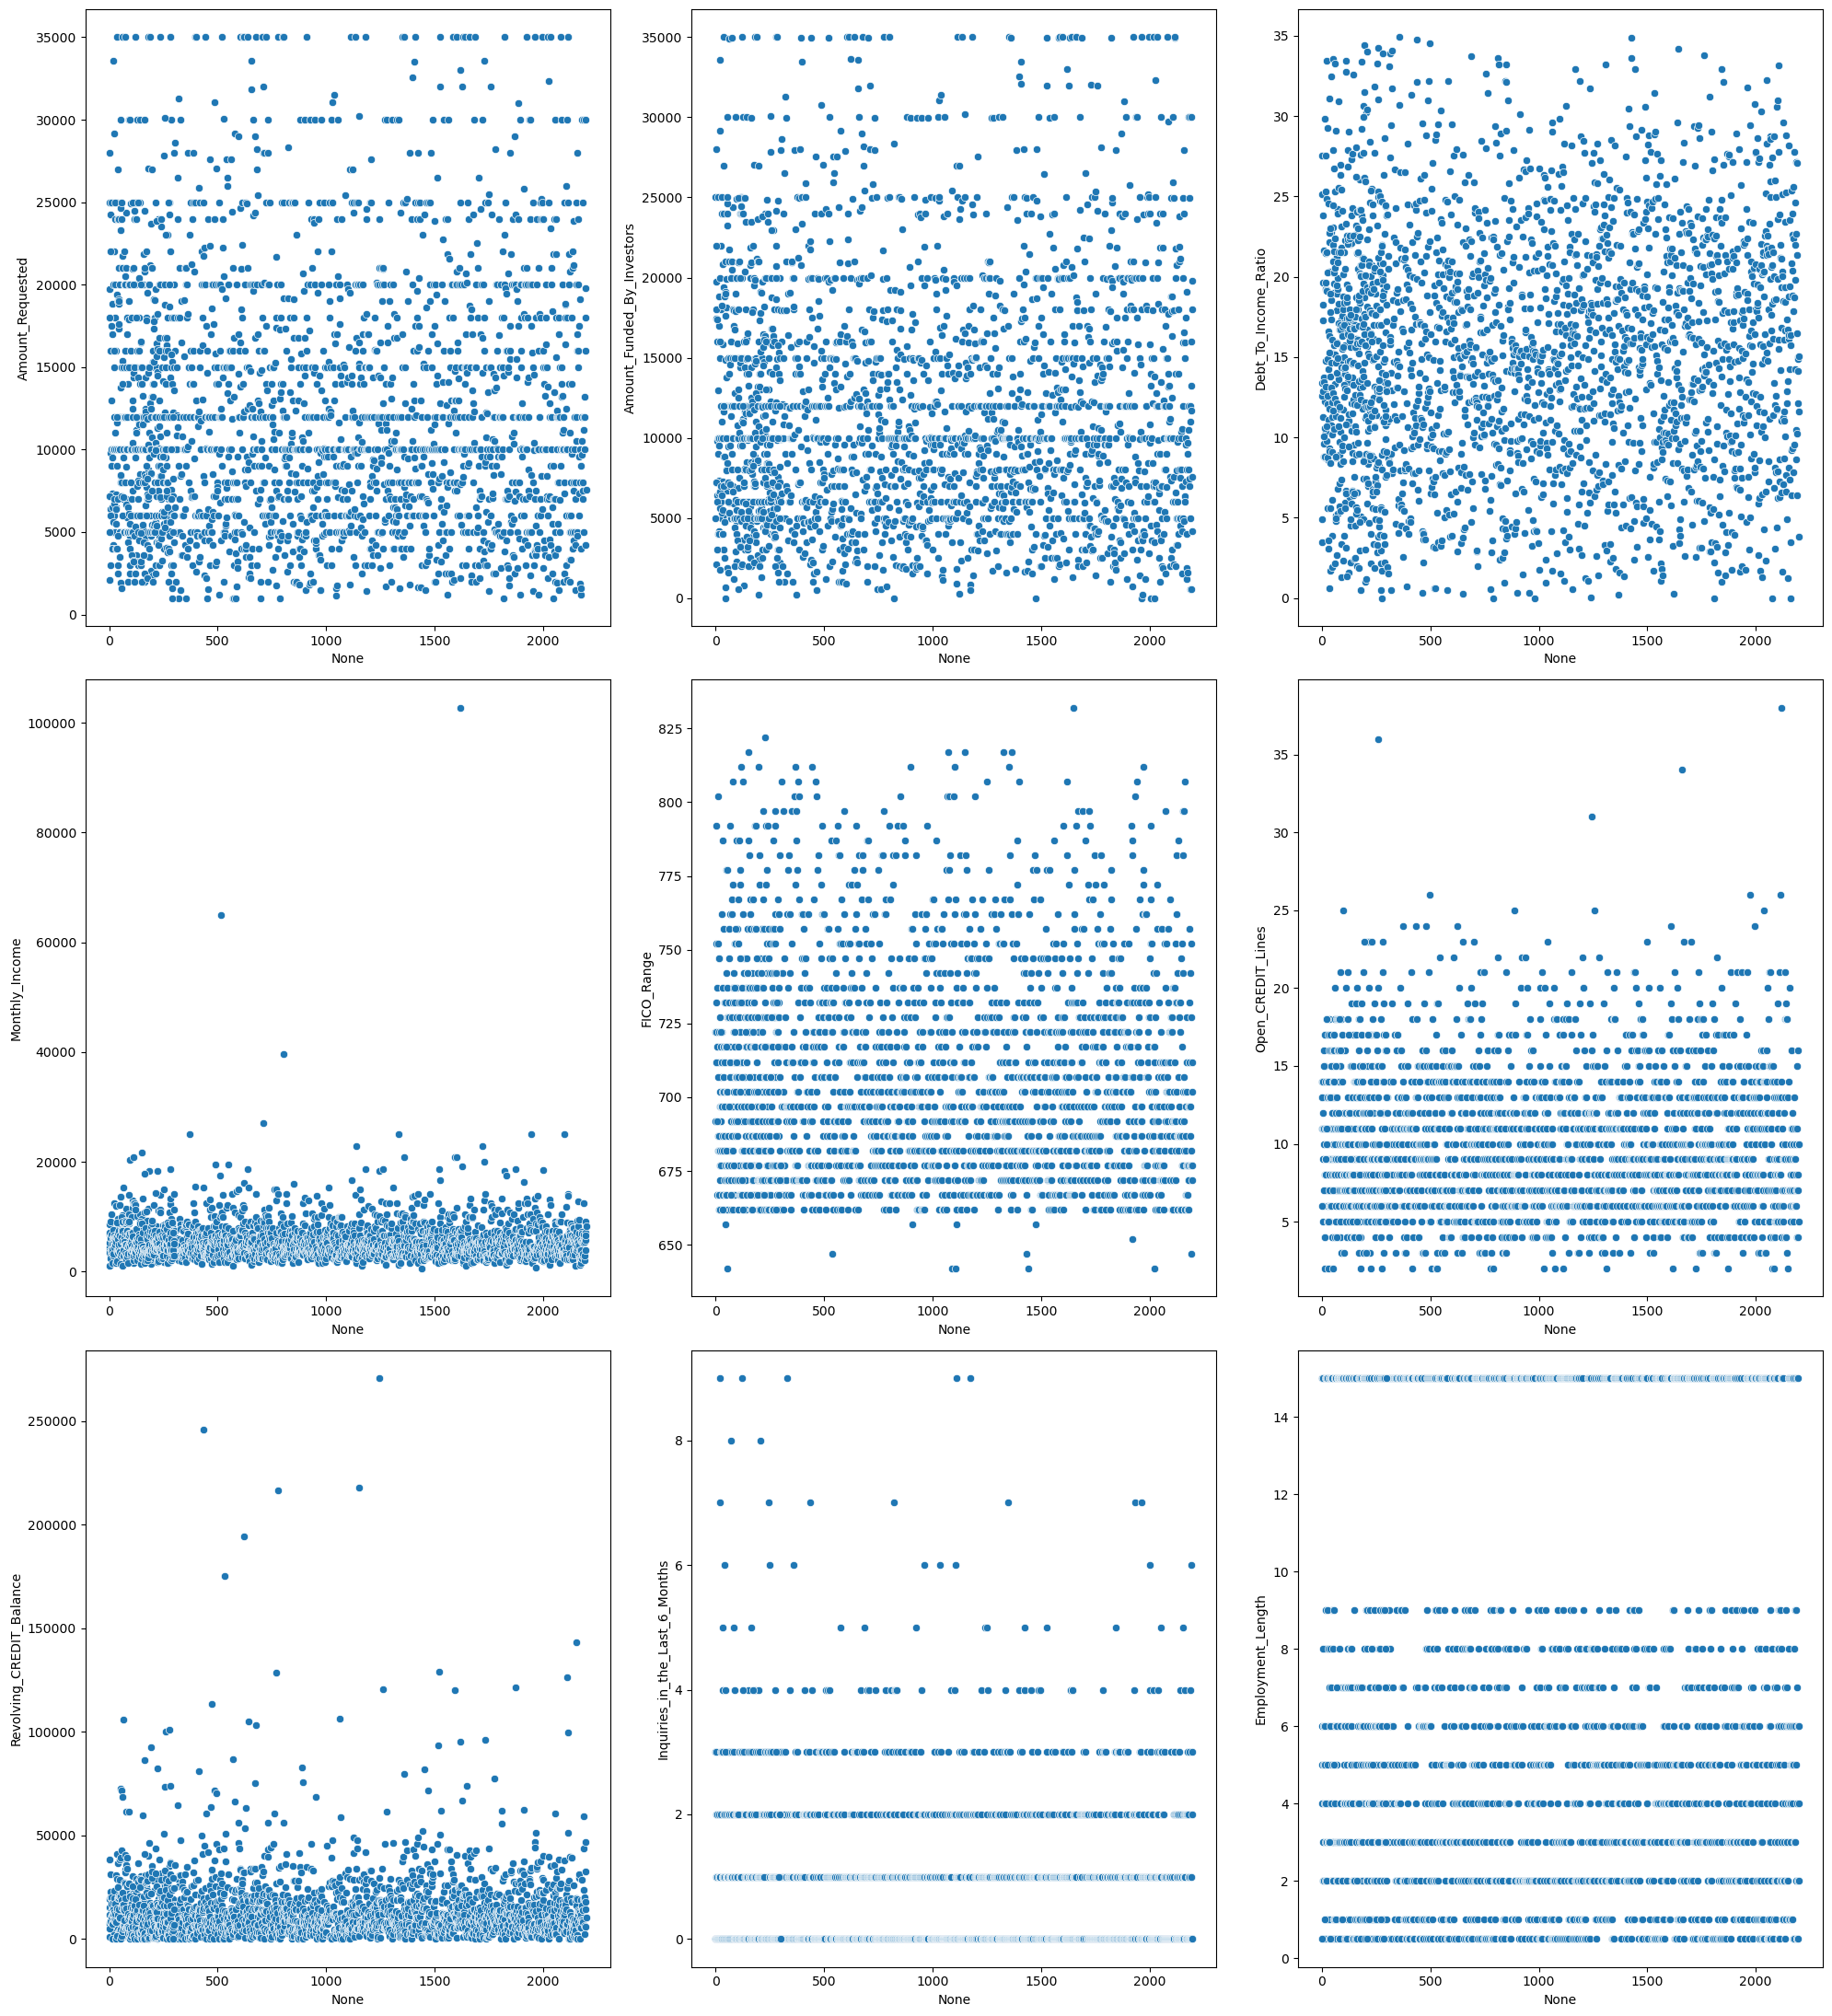

In [44]:
plt.figure(figsize=(20,22),dpi=100)
axes = 1
for col in columns_numeric:
    plt.subplot(3,3,axes)
    sns.scatterplot(x=data[col].index, y=data[col])
    axes+=1
plt.tight_layout()
plt.show()

In [45]:
def outlier_cap(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    
    data[column].clip(upper_limit,lower_limit, inplace=True)

In [46]:
for i in columns_numeric:
    outlier_cap(i)

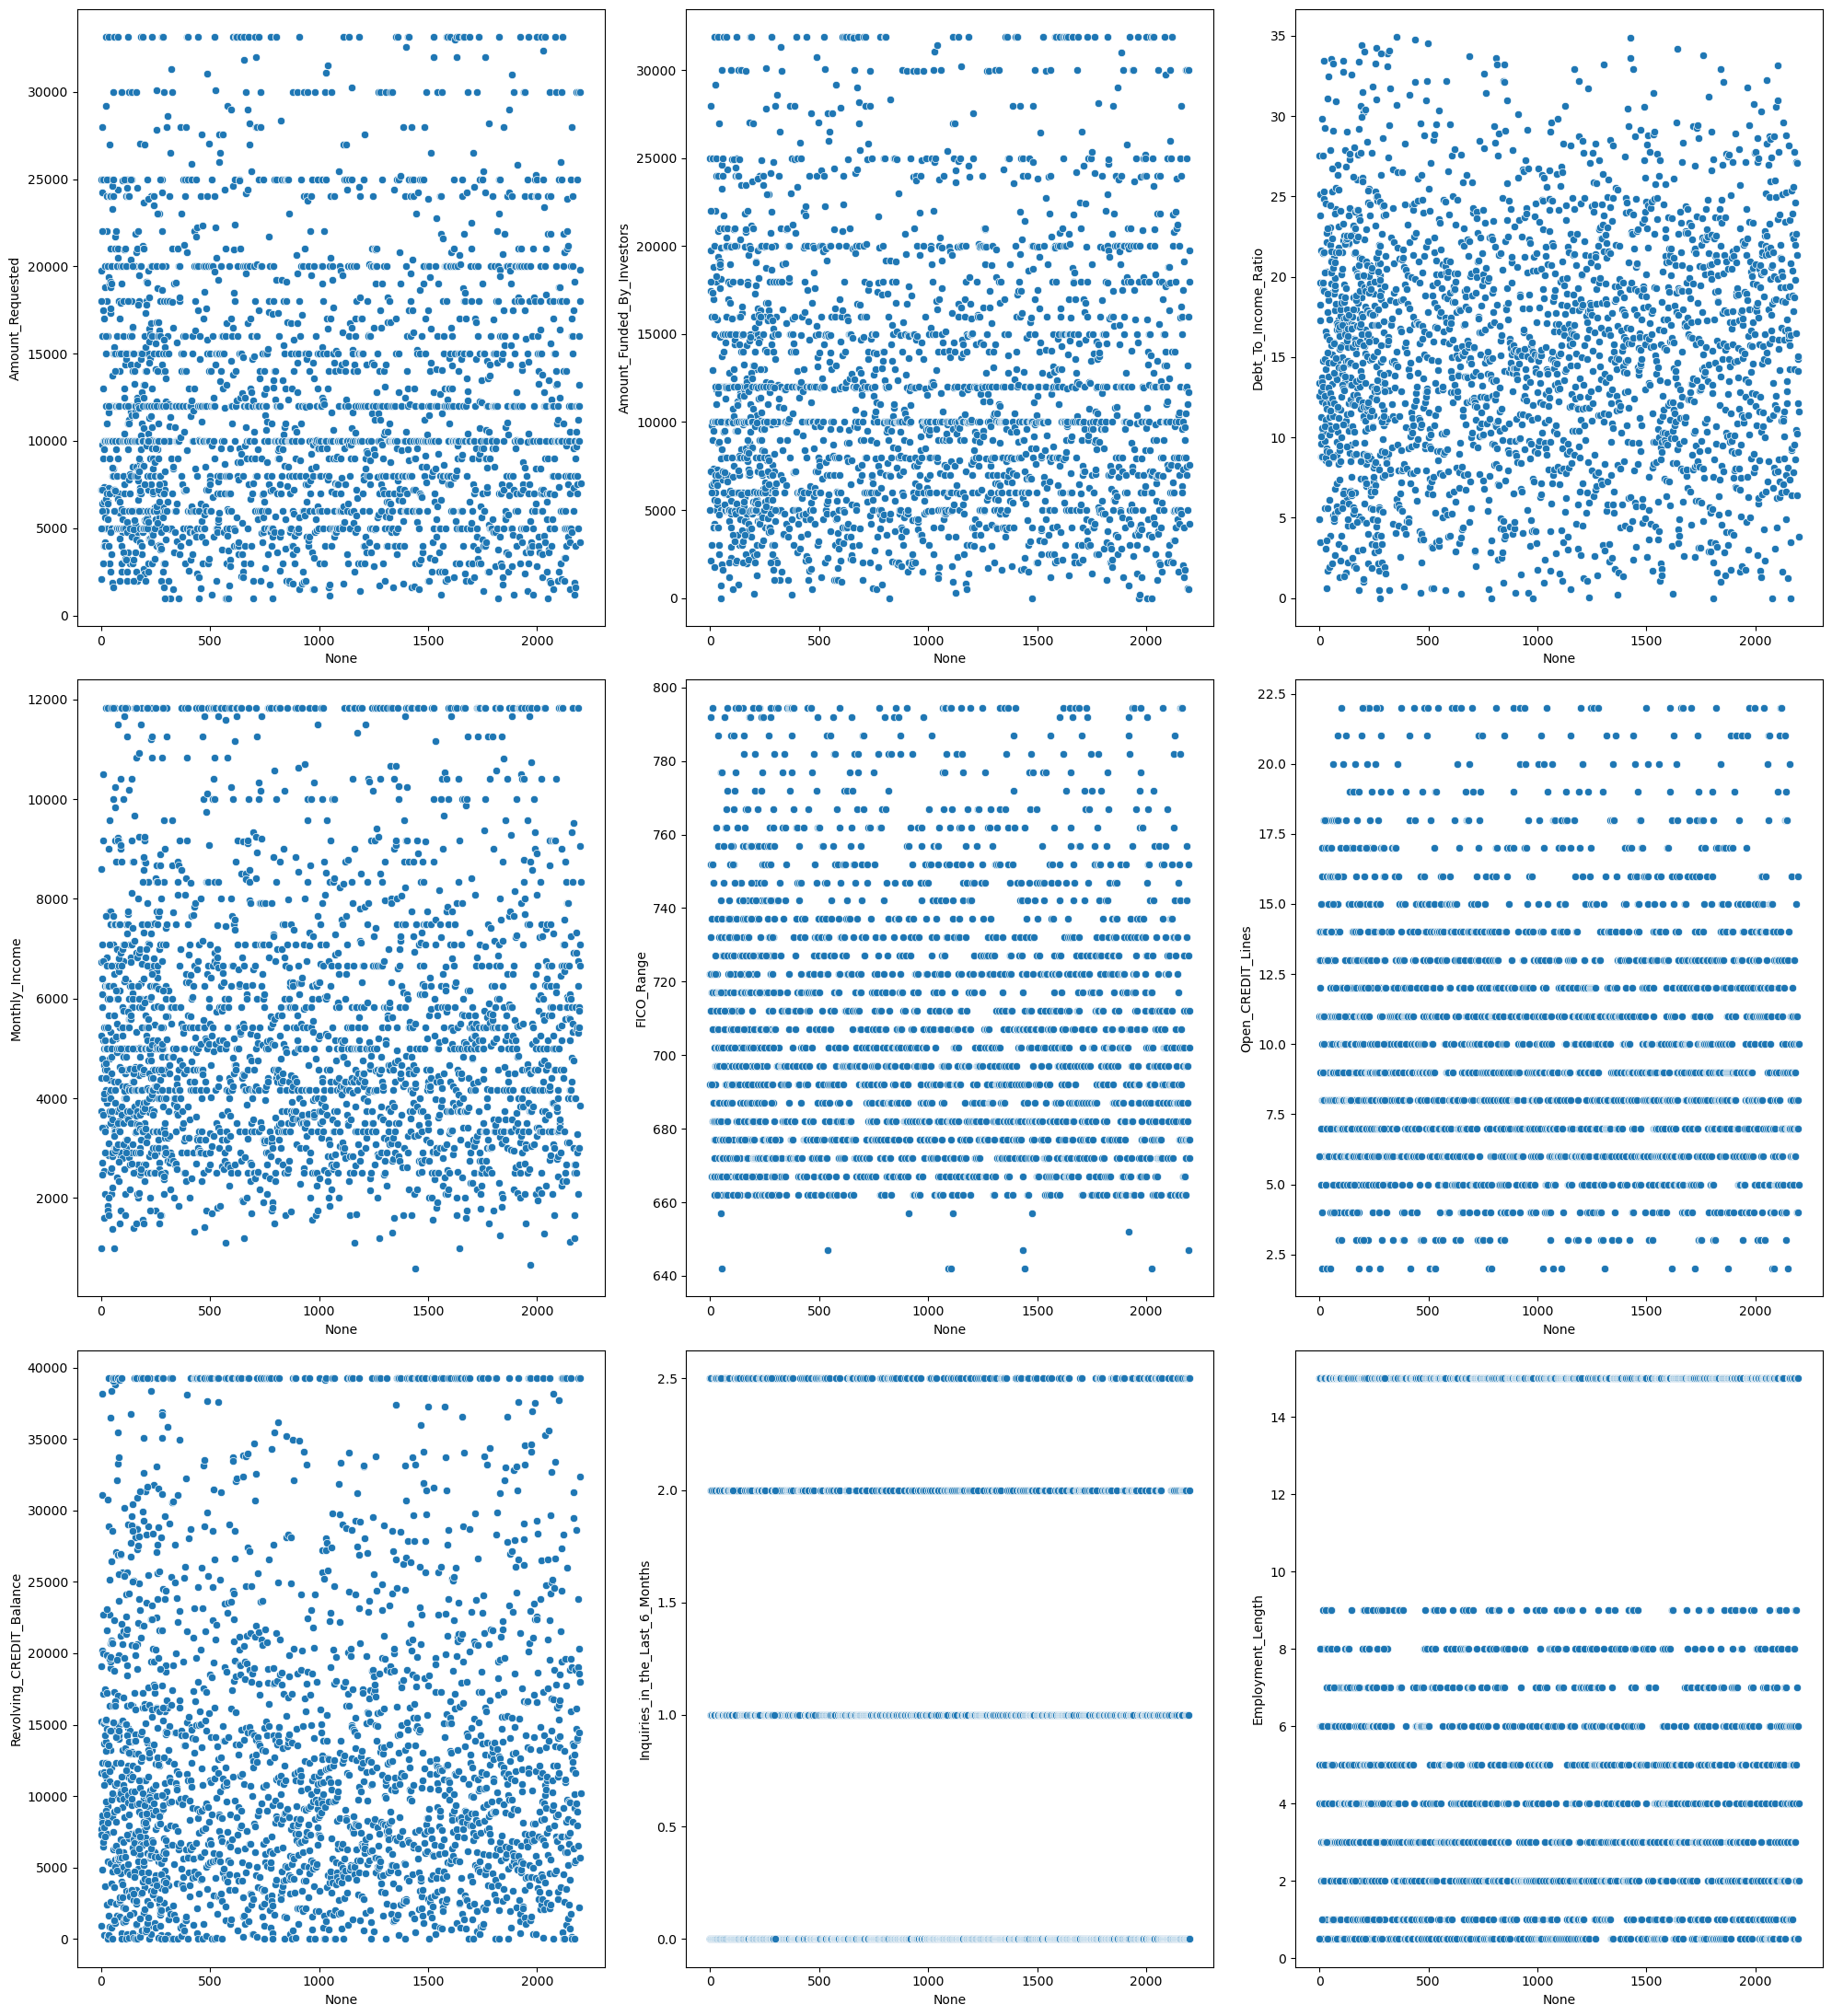

In [47]:
plt.figure(figsize=(20,22),dpi=100)
axes = 1
for col in columns_numeric:
    plt.subplot(3,3,axes)
    sns.scatterplot(x=data[col].index, y=data[col])
    axes+=1
plt.tight_layout()
plt.show()

* Outliers capped.

## Transforming Categorical columns

In [48]:
columns_categorical=[]
for i in data.columns:
    if i not in columns_numeric:
        columns_categorical.append(i)

columns_categorical

['Interest_Rate', 'Loan_Length', 'Loan_Purpose', 'State', 'Home_Ownership']

#### Loan_Purpose

In [49]:
data['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1260
credit_card            426
other                  182
home_improvement       143
major_purchase          98
small_business          82
car                     49
wedding                 38
moving                  28
medical                 28
house                   20
vacation                20
educational             14
renewable_energy         4
Name: count, dtype: int64

In [50]:
data['Loan_Purpose'].replace(dict.fromkeys(data['Loan_Purpose'].value_counts()[2:].index, 'other'), inplace=True)

In [51]:
data['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1260
other                  706
credit_card            426
Name: count, dtype: int64

#### Home_Ownership

In [52]:
data['Home_Ownership'].value_counts()

Home_Ownership
RENT        1104
MORTGAGE    1096
OWN          187
OTHER          5
Name: count, dtype: int64

In [53]:
data['Home_Ownership'] = data['Home_Ownership'].replace('OTHER','OWN')

In [54]:
data['Home_Ownership'].value_counts()

Home_Ownership
RENT        1104
MORTGAGE    1096
OWN          192
Name: count, dtype: int64

### Object columns encoding

#### Loan_Purpose

In [55]:
data['Loan_Purpose'].value_counts()

Loan_Purpose
debt_consolidation    1260
other                  706
credit_card            426
Name: count, dtype: int64

In [56]:
data = pd.get_dummies(data, columns=['Loan_Purpose'], dtype=int)

* For this feature(Loan_Purpose), tried labelling according to the general rates of interest from high to low. Turns out it is better to go with one-hot encoding only.

In [57]:
data

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0             25000.0                    25000.00         18.49         60.0   
1             19750.0                    19750.00         17.27         60.0   
2              2100.0                     2100.00         14.33         36.0   
3             28000.0                    28000.00         16.29         36.0   
4             24250.0                    17431.82         12.23         60.0   
..                ...                         ...           ...          ...   
295           12000.0                    11975.00      testdata         60.0   
296            5000.0                     5000.00      testdata         36.0   
297            4375.0                     4375.00      testdata         36.0   
298           13600.0                    13600.00      testdata         60.0   
299            6000.0                     6000.00      testdata         36.0   

     Debt_To_Income_Ratio State Home_Ownership  Monthly_Income  FICO_Range  \
0                   27.56    VA       MORTGAGE         8606.56       722.0   
1                   13.39    NY       MORTGAGE         6737.50       712.0   
2                    3.50    LA            OWN         1000.00       692.0   
3                   19.62    NV       MORTGAGE         7083.33       712.0   
4                   23.79    OH       MORTGAGE         5833.33       732.0   
..                    ...   ...            ...             ...         ...   
295                 13.91    NV       MORTGAGE         7083.33       707.0   
296                 17.22    CA            OWN         4000.00       707.0   
297                  9.09    CA           RENT         2916.67       672.0   
298                 12.85    MN           RENT         5651.33       677.0   
299                  7.64    IL       MORTGAGE         5184.75       677.0   

     Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0                 11.0                   15210.0   
1                 14.0                   19070.0   
2                 13.0                     893.0   
3                 12.0                   38194.0   
4                  6.0                   31061.0   
..                 ...                       ...   
295                7.0                    3923.0   
296               10.0                    6023.0   
297                9.0                    6944.0   
298               13.0                   24383.0   
299                8.0                   14422.0   

     Inquiries_in_the_Last_6_Months  Employment_Length  \
0                               2.5                5.0   
1                               2.5                4.0   
2                               1.0                0.5   
3                               1.0               15.0   
4                               2.0               15.0   
..                              ...                ...   
295                             2.0                7.0   
296                             0.0               15.0   
297                             2.0                6.0   
298                             0.0               15.0   
299                             0.0                2.0   

     Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                           0                                1   
1                           0                                1   
2                           0                                0   
3                           1                                0   
4                           1                                0   
..                        ...                              ...   
295                         0                                0   
296                         0                                1   
297                         1                                0   
298                         1                                0   
299                         0                              

#### Home_Ownership

In [58]:
data['Home_Ownership'].value_counts()

Home_Ownership
RENT        1104
MORTGAGE    1096
OWN          192
Name: count, dtype: int64

In [59]:
data['Home_Ownership'] = data['Home_Ownership'].replace({'OWN':1,'MORTGAGE':2,'RENT':3})

In [60]:
data

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0             25000.0                    25000.00         18.49         60.0   
1             19750.0                    19750.00         17.27         60.0   
2              2100.0                     2100.00         14.33         36.0   
3             28000.0                    28000.00         16.29         36.0   
4             24250.0                    17431.82         12.23         60.0   
..                ...                         ...           ...          ...   
295           12000.0                    11975.00      testdata         60.0   
296            5000.0                     5000.00      testdata         36.0   
297            4375.0                     4375.00      testdata         36.0   
298           13600.0                    13600.00      testdata         60.0   
299            6000.0                     6000.00      testdata         36.0   

     Debt_To_Income_Ratio State  Home_Ownership  Monthly_Income  FICO_Range  \
0                   27.56    VA               2         8606.56       722.0   
1                   13.39    NY               2         6737.50       712.0   
2                    3.50    LA               1         1000.00       692.0   
3                   19.62    NV               2         7083.33       712.0   
4                   23.79    OH               2         5833.33       732.0   
..                    ...   ...             ...             ...         ...   
295                 13.91    NV               2         7083.33       707.0   
296                 17.22    CA               1         4000.00       707.0   
297                  9.09    CA               3         2916.67       672.0   
298                 12.85    MN               3         5651.33       677.0   
299                  7.64    IL               2         5184.75       677.0   

     Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0                 11.0                   15210.0   
1                 14.0                   19070.0   
2                 13.0                     893.0   
3                 12.0                   38194.0   
4                  6.0                   31061.0   
..                 ...                       ...   
295                7.0                    3923.0   
296               10.0                    6023.0   
297                9.0                    6944.0   
298               13.0                   24383.0   
299                8.0                   14422.0   

     Inquiries_in_the_Last_6_Months  Employment_Length  \
0                               2.5                5.0   
1                               2.5                4.0   
2                               1.0                0.5   
3                               1.0               15.0   
4                               2.0               15.0   
..                              ...                ...   
295                             2.0                7.0   
296                             0.0               15.0   
297                             2.0                6.0   
298                             0.0               15.0   
299                             0.0                2.0   

     Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                           0                                1   
1                           0                                1   
2                           0                                0   
3                           1                                0   
4                           1                                0   
..                        ...                              ...   
295                         0                                0   
296                         0                                1   
297                         1                                0   
298                         1                                0   
299                         0                  

### Dropping seemingly irrelevant column of State

In [61]:
data = data.drop(['State'], axis=1)

In [62]:
data.head(2)

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0           25000.0                     25000.0         18.49         60.0   
1           19750.0                     19750.0         17.27         60.0   

   Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                 27.56               2         8606.56       722.0   
1                 13.39               2         6737.50       712.0   

   Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0               11.0                   15210.0   
1               14.0                   19070.0   

   Inquiries_in_the_Last_6_Months  Employment_Length  \
0                             2.5                5.0   
1                             2.5                4.0   

   Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                         0                                1   
1                         0                                1   

   Loan_Purpose_other  
0                   0  
1                   0

## Seperate Train and Test data

In [63]:
train = data[data['Interest_Rate']!='testdata']
train

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0              25000.0                    25000.00         18.49         60.0   
1              19750.0                    19750.00         17.27         60.0   
2               2100.0                     2100.00         14.33         36.0   
3              28000.0                    28000.00         16.29         36.0   
4              24250.0                    17431.82         12.23         60.0   
...                ...                         ...           ...          ...   
2195           30000.0                    30000.00         23.28         60.0   
2196            4200.0                     4200.00         14.33         60.0   
2197           19800.0                    19775.00         15.31         60.0   
2198           18000.0                    18000.00         20.99         60.0   
2199            7550.0                     7550.00         10.16         36.0   

      Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                    27.56               2         8606.56       722.0   
1                    13.39               2         6737.50       712.0   
2                     3.50               1         1000.00       692.0   
3                    19.62               2         7083.33       712.0   
4                    23.79               2         5833.33       732.0   
...                    ...             ...             ...         ...   
2195                 12.10               2         7083.33       677.0   
2196                 14.16               3         3850.00       702.0   
2197                 15.03               2         6666.67       677.0   
2198                 11.63               3         9051.83       672.0   
2199                  3.83               2         8333.33       712.0   

      Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0                  11.0                 15210.000   
1                  14.0                 19070.000   
2                  13.0                   893.000   
3                  12.0                 38194.000   
4                   6.0                 31061.000   
...                 ...                       ...   
2195               16.0                 17969.000   
2196                4.0                  5718.000   
2197               10.0                 39259.375   
2198                5.0                 32394.000   
2199               10.0                 10204.000   

      Inquiries_in_the_Last_6_Months  Employment_Length  \
0                                2.5                5.0   
1                                2.5                4.0   
2                                1.0                0.5   
3                                1.0               15.0   
4                                2.0               15.0   
...                              ...                ...   
2195                             1.0               15.0   
2196                             0.0                2.0   
2197                             2.5                6.0   
2198                             2.0                4.0   
2199                             0.0                2.0   

      Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                            0                                1   
1                            0                                1   
2                            0                                0   
3                            1                                0   
4                            1                                0   
...                        ...                              ...   
2195                         0                                0   
2196                         0                                0   
2197                         0                                1   
2198                         1                                0   
2199                         0                               

In [64]:
train['Interest_Rate'] = train['Interest_Rate'].astype(float)

In [65]:
test = data[data['Interest_Rate']=='testdata']
test

Amount_Requested  Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0              5000.0                      5000.0      testdata         60.0   
1             18000.0                     18000.0      testdata         60.0   
2              7200.0                      7200.0      testdata         60.0   
3              7200.0                      7200.0      testdata         36.0   
4             22000.0                     22000.0      testdata         60.0   
..                ...                         ...           ...          ...   
295           12000.0                     11975.0      testdata         60.0   
296            5000.0                      5000.0      testdata         36.0   
297            4375.0                      4375.0      testdata         36.0   
298           13600.0                     13600.0      testdata         60.0   
299            6000.0                      6000.0      testdata         36.0   

     Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                   12.59               3         4416.67       692.0   
1                    4.93               3         5258.50       712.0   
2                   25.16               2         3750.00       752.0   
3                   17.27               2         3416.67       792.0   
4                   18.28               2         6083.33       722.0   
..                    ...             ...             ...         ...   
295                 13.91               2         7083.33       707.0   
296                 17.22               1         4000.00       707.0   
297                  9.09               3         2916.67       672.0   
298                 12.85               3         5651.33       677.0   
299                  7.64               2         5184.75       677.0   

     Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0                 13.0                    7686.0   
1                  6.0                   11596.0   
2                 13.0                    7283.0   
3                 14.0                    4838.0   
4                  9.0                   20181.0   
..                 ...                       ...   
295                7.0                    3923.0   
296               10.0                    6023.0   
297                9.0                    6944.0   
298               13.0                   24383.0   
299                8.0                   14422.0   

     Inquiries_in_the_Last_6_Months  Employment_Length  \
0                               0.0                0.5   
1                               0.0               15.0   
2                               0.0                6.0   
3                               0.0               15.0   
4                               0.0                8.0   
..                              ...                ...   
295                             2.0                7.0   
296                             0.0               15.0   
297                             2.0                6.0   
298                             0.0               15.0   
299                             0.0                2.0   

     Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                           0                                0   
1                           0                                1   
2                           0                                1   
3                           0                                1   
4                           0                                1   
..                        ...                              ...   
295                         0                                0   
296                         0                                1   
297                         1                                0   
298                         1                                0   
299                         0                                1   

     Loan_Purpose_other  
0                     1  


In [66]:
test = test.drop(['Interest_Rate'], axis=1)

In [67]:
test.head(2)

Amount_Requested  Amount_Funded_By_Investors  Loan_Length  \
0            5000.0                      5000.0         60.0   
1           18000.0                     18000.0         60.0   

   Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                 12.59               3         4416.67       692.0   
1                  4.93               3         5258.50       712.0   

   Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0               13.0                    7686.0   
1                6.0                   11596.0   

   Inquiries_in_the_Last_6_Months  Employment_Length  \
0                             0.0                0.5   
1                             0.0               15.0   

   Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                         0                                0   
1                         0                                1   

   Loan_Purpose_other  
0                   1  
1                   0

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2104 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount_Requested                 2104 non-null   float64
 1   Amount_Funded_By_Investors       2104 non-null   float64
 2   Interest_Rate                    2104 non-null   float64
 3   Loan_Length                      2104 non-null   float64
 4   Debt_To_Income_Ratio             2104 non-null   float64
 5   Home_Ownership                   2104 non-null   int64  
 6   Monthly_Income                   2104 non-null   float64
 7   FICO_Range                       2104 non-null   float64
 8   Open_CREDIT_Lines                2104 non-null   float64
 9   Revolving_CREDIT_Balance         2104 non-null   float64
 10  Inquiries_in_the_Last_6_Months   2104 non-null   float64
 11  Employment_Length                2104 non-null   float64
 12  Loan_Purpose_credit_card 

In [69]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount_Requested                 288 non-null    float64
 1   Amount_Funded_By_Investors       288 non-null    float64
 2   Loan_Length                      288 non-null    float64
 3   Debt_To_Income_Ratio             288 non-null    float64
 4   Home_Ownership                   288 non-null    int64  
 5   Monthly_Income                   288 non-null    float64
 6   FICO_Range                       288 non-null    float64
 7   Open_CREDIT_Lines                288 non-null    float64
 8   Revolving_CREDIT_Balance         288 non-null    float64
 9   Inquiries_in_the_Last_6_Months   288 non-null    float64
 10  Employment_Length                288 non-null    float64
 11  Loan_Purpose_credit_card         288 non-null    int32  
 12  Loan_Purpose_debt_consolida

## Seperating Feature and Target variables

In [70]:
features = train.drop(['Interest_Rate'], axis=1)

In [71]:
features

Amount_Requested  Amount_Funded_By_Investors  Loan_Length  \
0              25000.0                    25000.00         60.0   
1              19750.0                    19750.00         60.0   
2               2100.0                     2100.00         36.0   
3              28000.0                    28000.00         36.0   
4              24250.0                    17431.82         60.0   
...                ...                         ...          ...   
2195           30000.0                    30000.00         60.0   
2196            4200.0                     4200.00         60.0   
2197           19800.0                    19775.00         60.0   
2198           18000.0                    18000.00         60.0   
2199            7550.0                     7550.00         36.0   

      Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                    27.56               2         8606.56       722.0   
1                    13.39               2         6737.50       712.0   
2                     3.50               1         1000.00       692.0   
3                    19.62               2         7083.33       712.0   
4                    23.79               2         5833.33       732.0   
...                    ...             ...             ...         ...   
2195                 12.10               2         7083.33       677.0   
2196                 14.16               3         3850.00       702.0   
2197                 15.03               2         6666.67       677.0   
2198                 11.63               3         9051.83       672.0   
2199                  3.83               2         8333.33       712.0   

      Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0                  11.0                 15210.000   
1                  14.0                 19070.000   
2                  13.0                   893.000   
3                  12.0                 38194.000   
4                   6.0                 31061.000   
...                 ...                       ...   
2195               16.0                 17969.000   
2196                4.0                  5718.000   
2197               10.0                 39259.375   
2198                5.0                 32394.000   
2199               10.0                 10204.000   

      Inquiries_in_the_Last_6_Months  Employment_Length  \
0                                2.5                5.0   
1                                2.5                4.0   
2                                1.0                0.5   
3                                1.0               15.0   
4                                2.0               15.0   
...                              ...                ...   
2195                             1.0               15.0   
2196                             0.0                2.0   
2197                             2.5                6.0   
2198                             2.0                4.0   
2199                             0.0                2.0   

      Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                            0                                1   
1                            0                                1   
2                            0                                0   
3                            1                                0   
4                            1                                0   
...                        ...                              ...   
2195                         0                                0   
2196                         0                                0   
2197                         0                                1   
2198                         1                                0   
2199                         0                                1   

      Loan_Purpose_other  
0                      0  
1                      0  
2                      1  
3                      0  
4                      0  

In [72]:
target = train['Interest_Rate']

target

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2104, dtype: float64

## Train_test_split

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(features, target, test_size=0.2, random_state=852)

print('Features_train:',X_train.shape,'Features_validation:',X_validation.shape)
print('Target_train:',y_train.shape,'Target_train:',y_validation.shape)

Features_train: (1683, 14) Features_validation: (421, 14)
Target_train: (1683,) Target_train: (421,)


## Building Model

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [76]:
LR.score(X_train,y_train)

0.7679538828564617

In [77]:
y_pred_test = LR.predict(X_validation)

In [78]:
LR.score(X_validation,y_validation)

0.7993386305617727

### Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(features)
X_scaled = pd.DataFrame(X_scale, columns=features.columns)

In [80]:
X_train1, X_validation1, y_train1, y_validation1 = train_test_split(X_scaled, target, test_size=0.2, random_state=950)

In [81]:
LR.fit(X_train1,y_train1)

LinearRegression()

In [82]:
LR.score(X_train1,y_train1)

0.773956807537923

In [83]:
LR.score(X_validation1,y_validation1)

0.7817004502358479

* Feature scaling didn't create much difference.

## Checking assumptions for Linear Regression

#### 1.Linearity between features and target variables

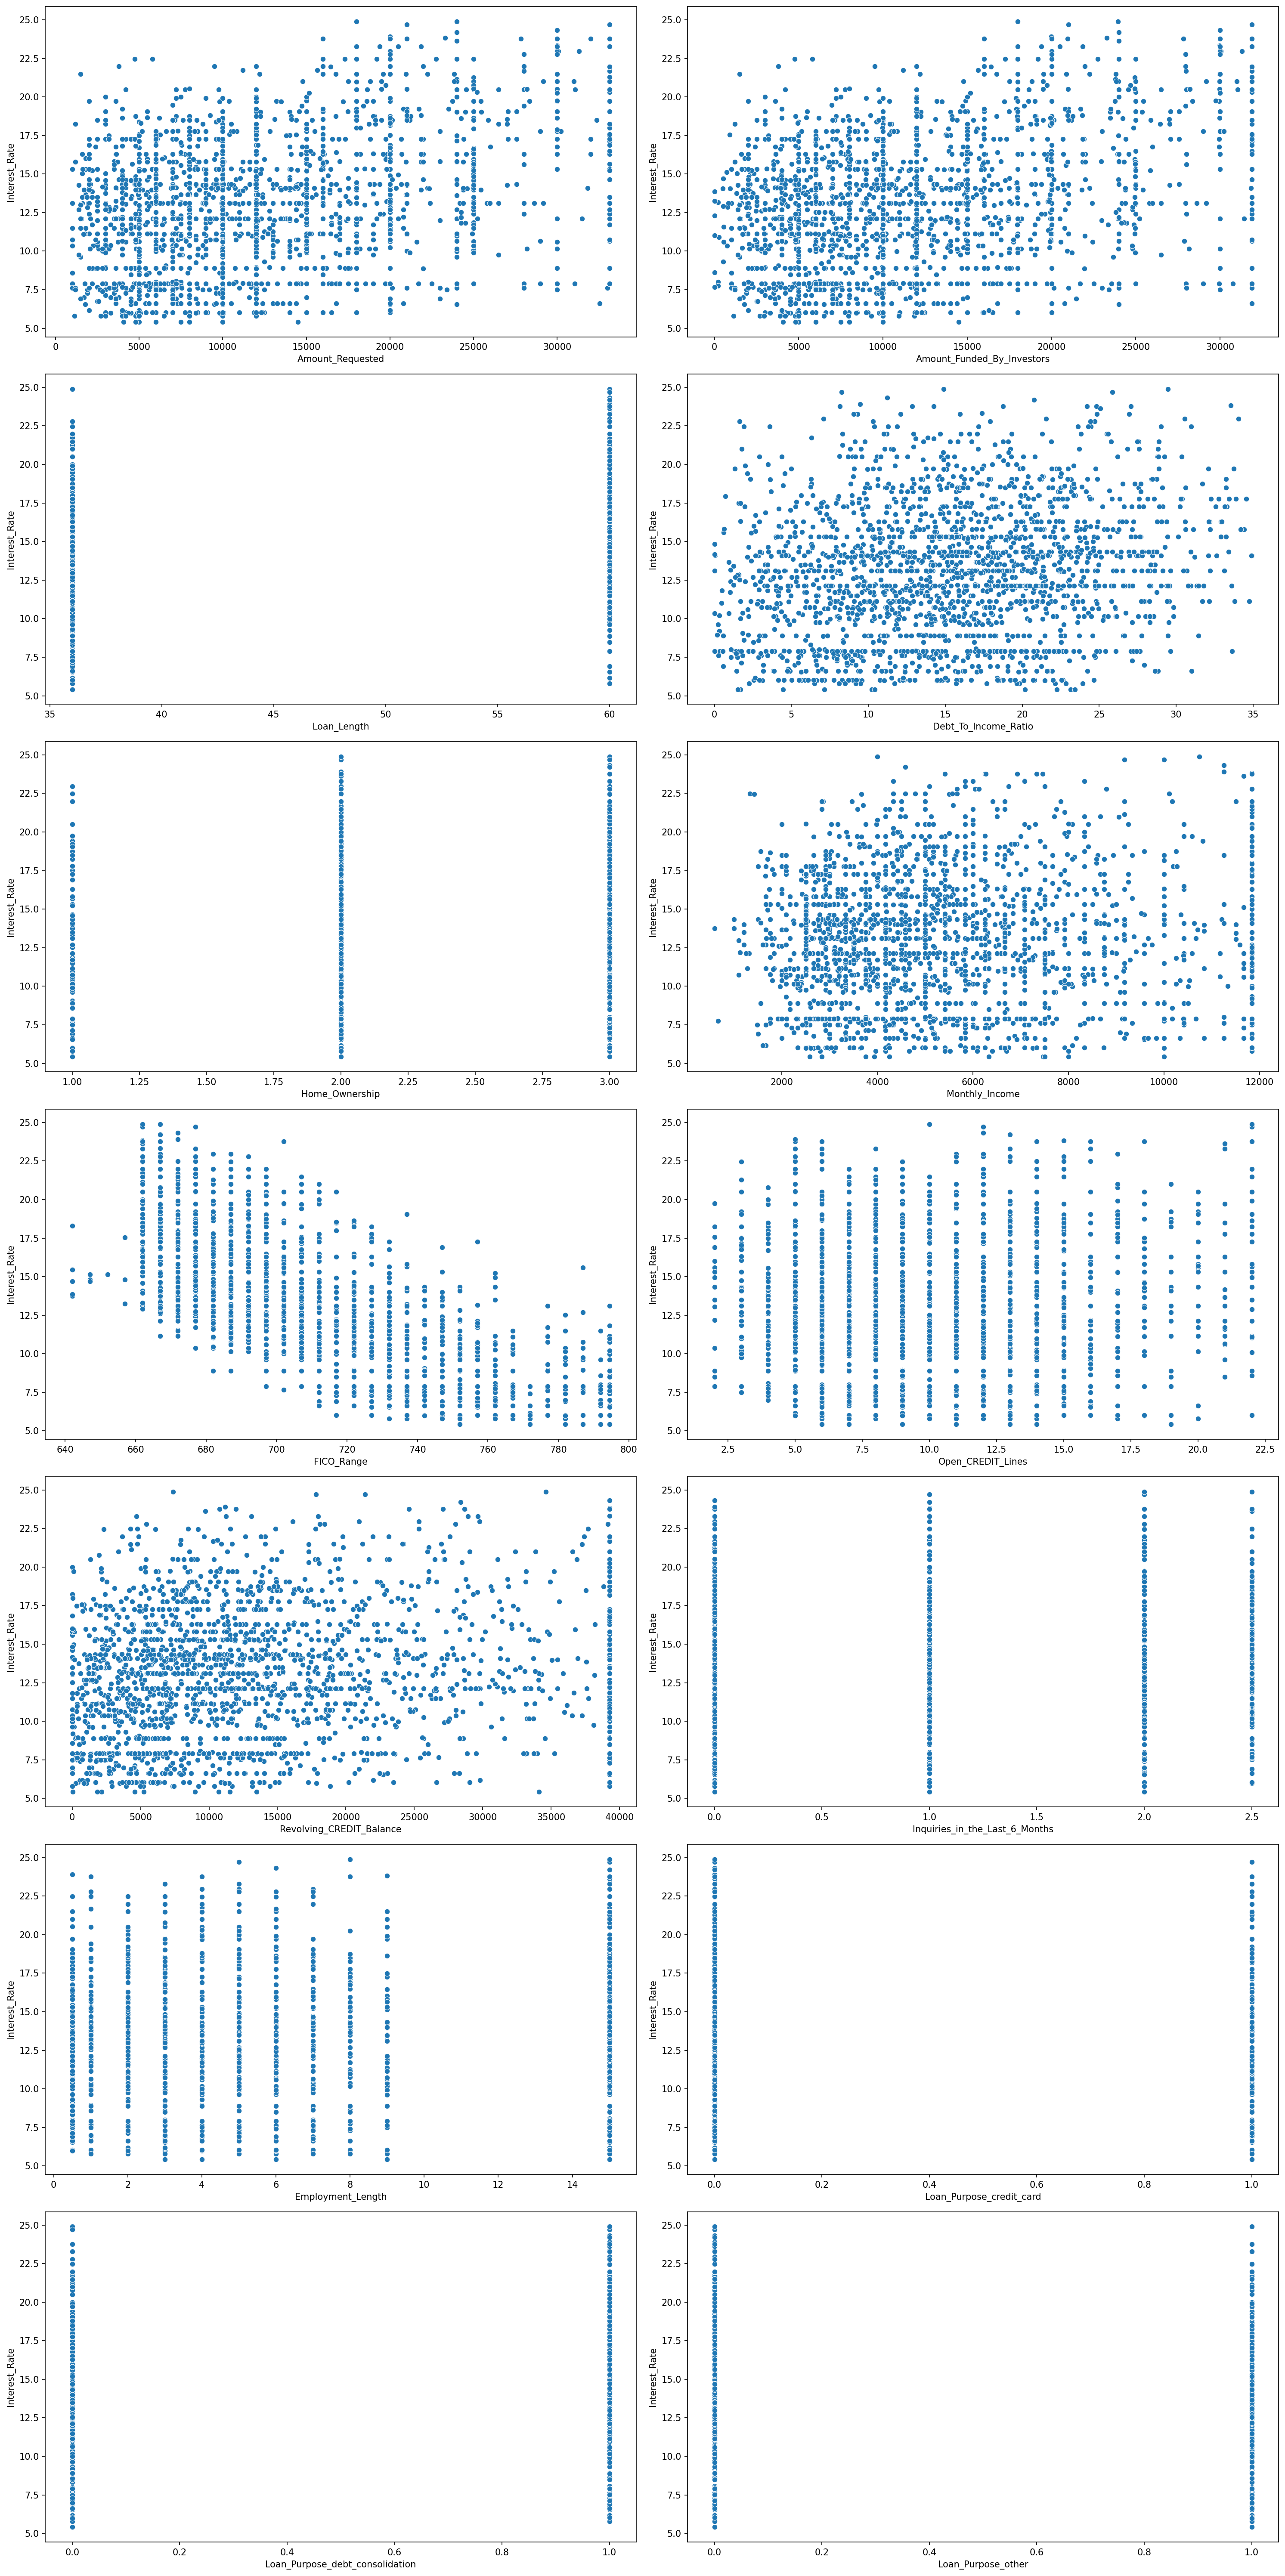

In [84]:
plt.figure(figsize=(20,40), dpi=150)
ax = 1
for i in features.columns:
    plt.subplot(7,2,ax)
    sns.scatterplot(x=features[i], y=target)
    ax += 1
plt.tight_layout()
plt.show()

* Linear relationship can't be established clearly

#### 2.Multicollinearity

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train,i))

VIF = pd.DataFrame()
VIF['Features'] = features.columns
VIF['VIF'] = vif
VIF

Features         VIF
0                  Amount_Requested   15.993268
1        Amount_Funded_By_Investors   15.543521
2                       Loan_Length    1.228540
3              Debt_To_Income_Ratio    1.499685
4                    Home_Ownership    1.074310
5                    Monthly_Income    1.677684
6                        FICO_Range    1.146186
7                 Open_CREDIT_Lines    1.383855
8          Revolving_CREDIT_Balance    1.680658
9    Inquiries_in_the_Last_6_Months    1.051212
10                Employment_Length    1.082152
11         Loan_Purpose_credit_card   99.179709
12  Loan_Purpose_debt_consolidation  299.395017
13               Loan_Purpose_other  171.332162

* Variables 'Amount_Requested, Amount_Funded_By_Investors' and 'Loan_Purpose_credit_card, Loan_Purpose_debt_consolidation, Loan_Purpose_other' show high values of variance inflation factor, indicating relationship among themeselves.

#### 3.Normality of Residual

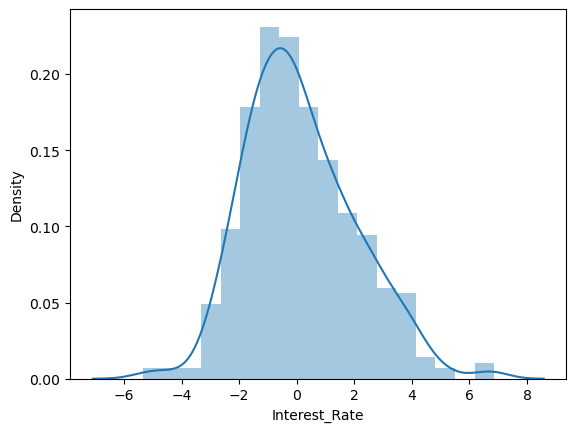

In [86]:
residual = y_validation-y_pred_test

sns.distplot(residual)
plt.show()

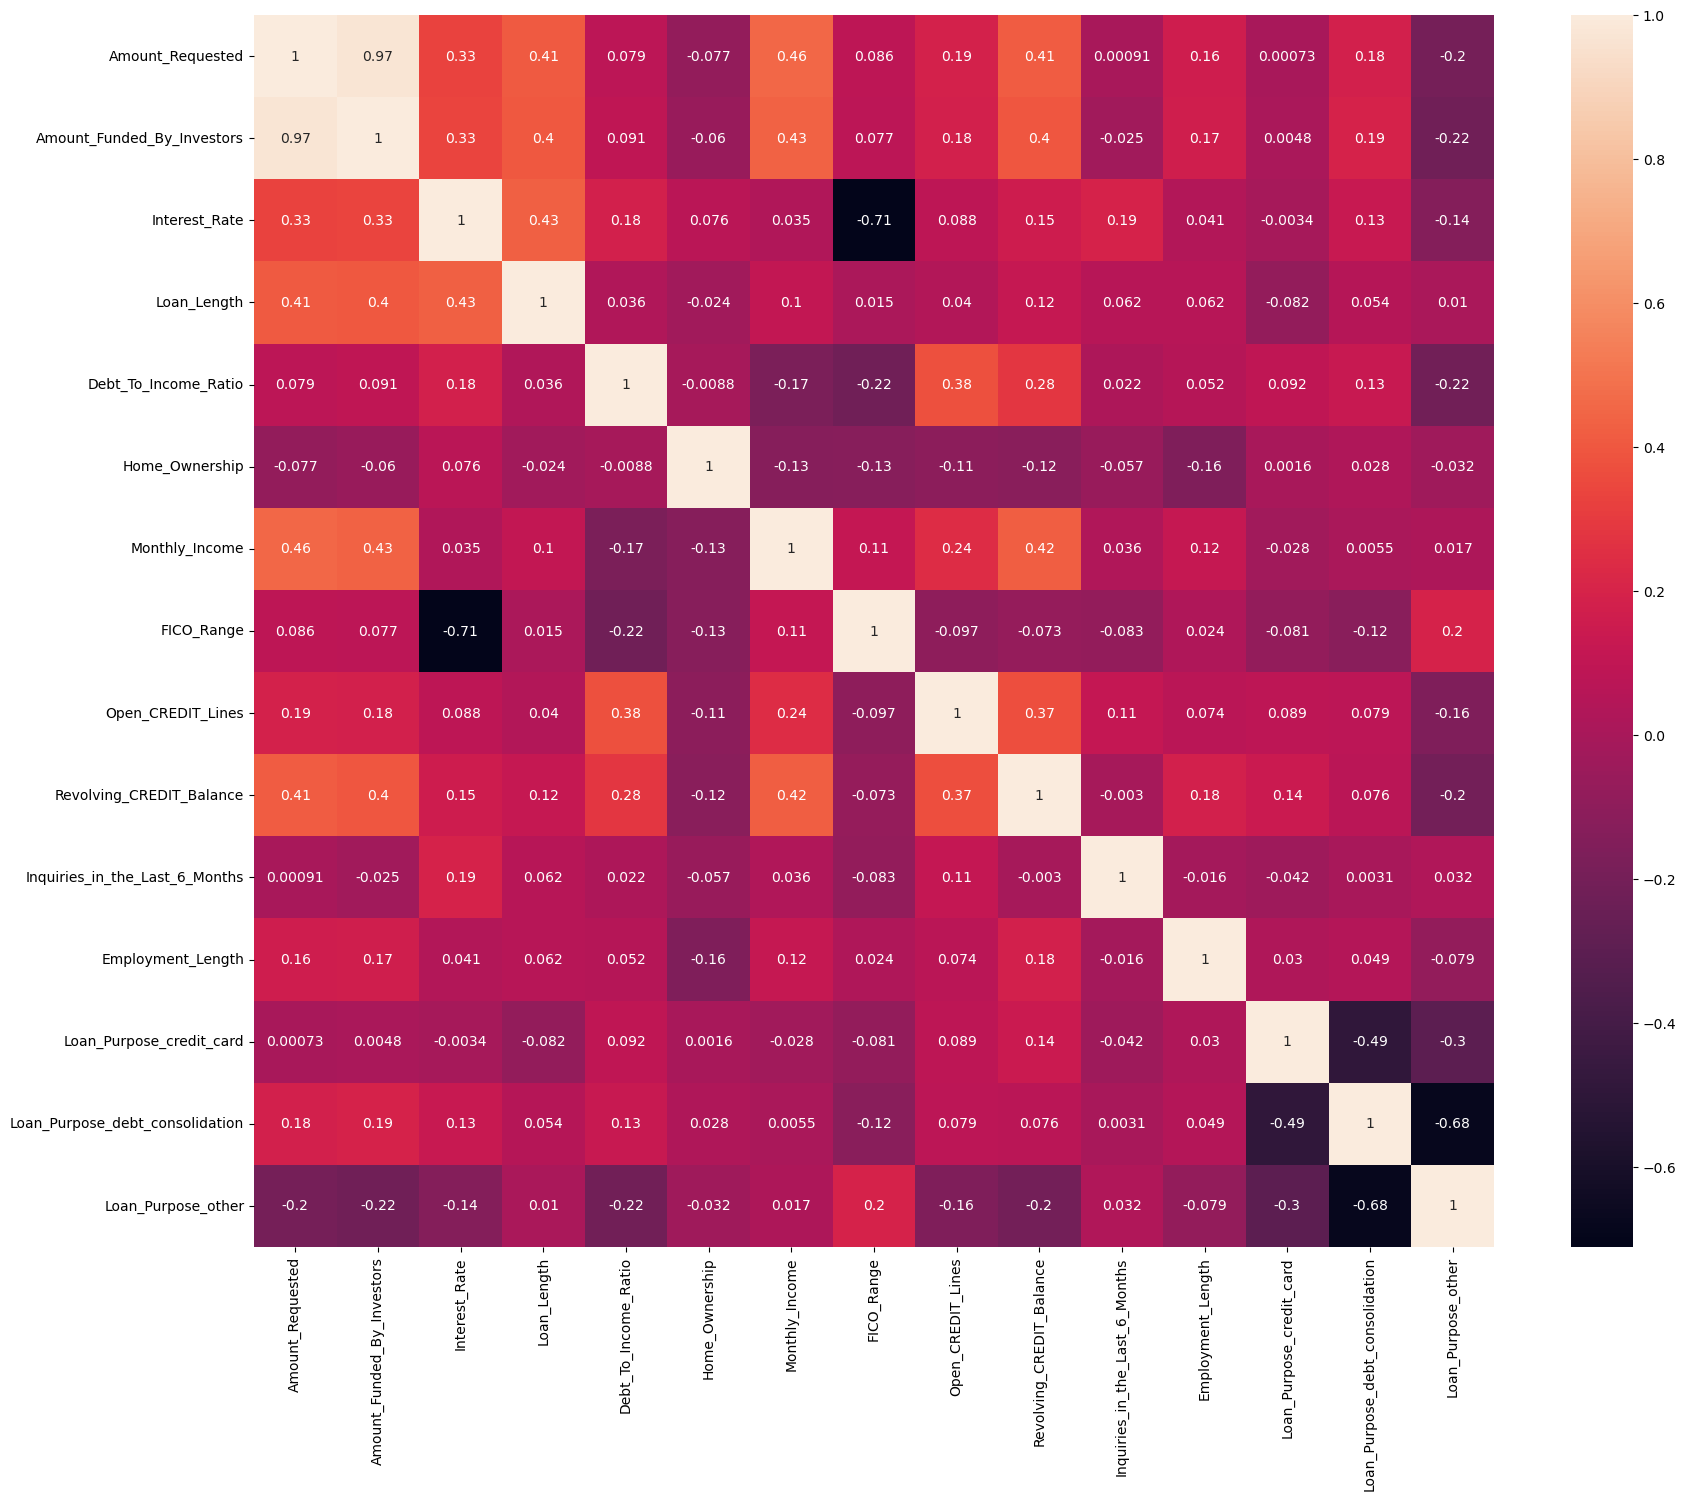

In [87]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(),annot=True)
plt.show()

* From the above heatmap, it can be observed that features- Amount_Requested and Amount_Funded_By_Investors are showing similar correlation.
* Hence, it is wise to drop one of these two columns. Let's drop Amount_Requested

## Dropping Features

In [88]:
data_updated = data.copy()

In [89]:
data_updated = data_updated.drop(['Amount_Requested'], axis=1)

In [90]:
data_updated.head(2)

Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0                     25000.0         18.49         60.0   
1                     19750.0         17.27         60.0   

   Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                 27.56               2         8606.56       722.0   
1                 13.39               2         6737.50       712.0   

   Open_CREDIT_Lines  Revolving_CREDIT_Balance  \
0               11.0                   15210.0   
1               14.0                   19070.0   

   Inquiries_in_the_Last_6_Months  Employment_Length  \
0                             2.5                5.0   
1                             2.5                4.0   

   Loan_Purpose_credit_card  Loan_Purpose_debt_consolidation  \
0                         0                                1   
1                         0                                1   

   Loan_Purpose_other  
0                   0  
1                   0

* Furthermore, features- Home_Ownership, Open_CREDIT_Lines, Employment_Length, Loan_Purpose_credit_card are showing very weak correlation with the target
* These can be dropped for simplifying the model.

In [91]:
data_updated = data_updated.drop(['Home_Ownership','Open_CREDIT_Lines','Employment_Length','Loan_Purpose_credit_card'], axis=1)

In [92]:
data_updated.head(2)

Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0                     25000.0         18.49         60.0   
1                     19750.0         17.27         60.0   

   Debt_To_Income_Ratio  Monthly_Income  FICO_Range  Revolving_CREDIT_Balance  \
0                 27.56         8606.56       722.0                   15210.0   
1                 13.39         6737.50       712.0                   19070.0   

   Inquiries_in_the_Last_6_Months  Loan_Purpose_debt_consolidation  \
0                             2.5                                1   
1                             2.5                                1   

   Loan_Purpose_other  
0                   0  
1                   0

In [93]:
train_updated = data_updated[data_updated['Interest_Rate']!='testdata']
train_updated

Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0                       25000.00         18.49         60.0   
1                       19750.00         17.27         60.0   
2                        2100.00         14.33         36.0   
3                       28000.00         16.29         36.0   
4                       17431.82         12.23         60.0   
...                          ...           ...          ...   
2195                    30000.00         23.28         60.0   
2196                     4200.00         14.33         60.0   
2197                    19775.00         15.31         60.0   
2198                    18000.00         20.99         60.0   
2199                     7550.00         10.16         36.0   

      Debt_To_Income_Ratio  Monthly_Income  FICO_Range  \
0                    27.56         8606.56       722.0   
1                    13.39         6737.50       712.0   
2                     3.50         1000.00       692.0   
3                    19.62         7083.33       712.0   
4                    23.79         5833.33       732.0   
...                    ...             ...         ...   
2195                 12.10         7083.33       677.0   
2196                 14.16         3850.00       702.0   
2197                 15.03         6666.67       677.0   
2198                 11.63         9051.83       672.0   
2199                  3.83         8333.33       712.0   

      Revolving_CREDIT_Balance  Inquiries_in_the_Last_6_Months  \
0                    15210.000                             2.5   
1                    19070.000                             2.5   
2                      893.000                             1.0   
3                    38194.000                             1.0   
4                    31061.000                             2.0   
...                        ...                             ...   
2195                 17969.000                             1.0   
2196                  5718.000                             0.0   
2197                 39259.375                             2.5   
2198                 32394.000                             2.0   
2199                 10204.000                             0.0   

      Loan_Purpose_debt_consolidation  Loan_Purpose_other  
0                                   1                   0  
1                                   1                   0  
2                                   0                   1  
3                                   0                   0  
4                                   0                   0  
...                               ...                 ...  
2195                                0                   1  
2196                                0                   1  
2197                                1                   0  
2198                                0                   0  
2199                                1                   0  

[2104 rows x 10 columns]

In [94]:
train_updated['Interest_Rate'] = train_updated['Interest_Rate'].astype(float)

In [95]:
test_updated = data_updated[data_updated['Interest_Rate']=='testdata']
test_updated

Amount_Funded_By_Investors Interest_Rate  Loan_Length  \
0                        5000.0      testdata         60.0   
1                       18000.0      testdata         60.0   
2                        7200.0      testdata         60.0   
3                        7200.0      testdata         36.0   
4                       22000.0      testdata         60.0   
..                          ...           ...          ...   
295                     11975.0      testdata         60.0   
296                      5000.0      testdata         36.0   
297                      4375.0      testdata         36.0   
298                     13600.0      testdata         60.0   
299                      6000.0      testdata         36.0   

     Debt_To_Income_Ratio  Monthly_Income  FICO_Range  \
0                   12.59         4416.67       692.0   
1                    4.93         5258.50       712.0   
2                   25.16         3750.00       752.0   
3                   17.27         3416.67       792.0   
4                   18.28         6083.33       722.0   
..                    ...             ...         ...   
295                 13.91         7083.33       707.0   
296                 17.22         4000.00       707.0   
297                  9.09         2916.67       672.0   
298                 12.85         5651.33       677.0   
299                  7.64         5184.75       677.0   

     Revolving_CREDIT_Balance  Inquiries_in_the_Last_6_Months  \
0                      7686.0                             0.0   
1                     11596.0                             0.0   
2                      7283.0                             0.0   
3                      4838.0                             0.0   
4                     20181.0                             0.0   
..                        ...                             ...   
295                    3923.0                             2.0   
296                    6023.0                             0.0   
297                    6944.0                             2.0   
298                   24383.0                             0.0   
299                   14422.0                             0.0   

     Loan_Purpose_debt_consolidation  Loan_Purpose_other  
0                                  0                   1  
1                                  1                   0  
2                                  1                   0  
3                                  1                   0  
4                                  1                   0  
..                               ...                 ...  
295                                0                   1  
296                                1                   0  
297                                0                   0  
298                                0                   0  
299                                1                   0  

[288 rows x 10 columns]

In [96]:
test_updated = test_updated.drop(['Interest_Rate'], axis=1)

In [97]:
features_updated = train_updated.drop(['Interest_Rate'],axis=1)

In [98]:
target_updated = train_updated['Interest_Rate']

In [99]:
target_updated

0       18.49
1       17.27
2       14.33
3       16.29
4       12.23
        ...  
2195    23.28
2196    14.33
2197    15.31
2198    20.99
2199    10.16
Name: Interest_Rate, Length: 2104, dtype: float64

### Building Model with updated dataset

In [100]:
#train_test_split
X_train2,X_validation2,y_train2,y_validation2 = train_test_split(features_updated, target_updated, test_size=0.2, random_state=561)

In [101]:
LR.fit(X_train2, y_train2)

LinearRegression()

In [102]:
LR.score(X_train2, y_train2)

0.769638834096107

In [103]:
LR.score(X_validation2, y_validation2)

0.7849546621442379

* Tried log transformation but the dataset produced many infinity values. Hence, discarded.

## Applying Polynomial Transformation and Building Model on transformed data

In [104]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
data_poly_train = poly.fit_transform(features_updated)

feature_names = poly.get_feature_names_out(input_features=features_updated.columns)
data_poly_df1 = pd.DataFrame(data_poly_train, columns=feature_names)

data_poly_df1

1  Amount_Funded_By_Investors  Loan_Length  Debt_To_Income_Ratio  \
0     1.0                    25000.00         60.0                 27.56   
1     1.0                    19750.00         60.0                 13.39   
2     1.0                     2100.00         36.0                  3.50   
3     1.0                    28000.00         36.0                 19.62   
4     1.0                    17431.82         60.0                 23.79   
...   ...                         ...          ...                   ...   
2099  1.0                    30000.00         60.0                 12.10   
2100  1.0                     4200.00         60.0                 14.16   
2101  1.0                    19775.00         60.0                 15.03   
2102  1.0                    18000.00         60.0                 11.63   
2103  1.0                     7550.00         36.0                  3.83   

      Monthly_Income  FICO_Range  Revolving_CREDIT_Balance  \
0            8606.56       722.0                 15210.000   
1            6737.50       712.0                 19070.000   
2            1000.00       692.0                   893.000   
3            7083.33       712.0                 38194.000   
4            5833.33       732.0                 31061.000   
...              ...         ...                       ...   
2099         7083.33       677.0                 17969.000   
2100         3850.00       702.0                  5718.000   
2101         6666.67       677.0                 39259.375   
2102         9051.83       672.0                 32394.000   
2103         8333.33       712.0                 10204.000   

      Inquiries_in_the_Last_6_Months  Loan_Purpose_debt_consolidation  \
0                                2.5                              1.0   
1                                2.5                              1.0   
2                                1.0                              0.0   
3                                1.0                              0.0   
4                                2.0                              0.0   
...                              ...                              ...   
2099                             1.0                              0.0   
2100                             0.0                              0.0   
2101                             2.5                              1.0   
2102                             2.0                              0.0   
2103                             0.0                              1.0   

      Loan_Purpose_other  ...  Revolving_CREDIT_Balance^2  \
0                    0.0  ...                2.313441e+08   
1                    0.0  ...                3.636649e+08   
2                    1.0  ...                7.974490e+05   
3                    0.0  ...                1.458782e+09   
4                    0.0  ...                9.647857e+08   
...                  ...  ...                         ...   
2099                 1.0  ...                3.228850e+08   
2100                 1.0  ...                3.269552e+07   
2101                 0.0  ...                1.541299e+09   
2102                 0.0  ...                1.049371e+09   
2103                 0.0  ...                1.041216e+08   

      Revolving_CREDIT_Balance Inquiries_in_the_Last_6_Months  \
0                                            38025.0000         
1                                            47675.0000         
2                                              893.0000         
3                                            38194.0000         
4                                            62122.0000         
...                                                 ...         
2099                                         17969.0000         
2100                                             0.0000         
2101                                         98148.4375         
2102                                         64788.0000         
2103                     

In [105]:
X_poly_train1,X_poly_validation1,y_poly_train1,y_poly_validation1 = train_test_split(data_poly_df1, target_updated, test_size=0.2, random_state=205)

In [106]:
LR.fit(X_poly_train1,y_poly_train1)

LinearRegression()

In [107]:
LR.score(X_poly_train1,y_poly_train1)

0.8137453623686095

In [108]:
LR.score(X_poly_validation1,y_poly_validation1)

0.8311183905000842

## Applying Polynomial Transformation on original features(with dropped features)

In [109]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
data_poly_train = poly.fit_transform(features)

feature_names = poly.get_feature_names_out(input_features=features.columns)
data_poly_df = pd.DataFrame(data_poly_train, columns=feature_names)

In [110]:
data_poly_df

1  Amount_Requested  Amount_Funded_By_Investors  Loan_Length  \
0     1.0           25000.0                    25000.00         60.0   
1     1.0           19750.0                    19750.00         60.0   
2     1.0            2100.0                     2100.00         36.0   
3     1.0           28000.0                    28000.00         36.0   
4     1.0           24250.0                    17431.82         60.0   
...   ...               ...                         ...          ...   
2099  1.0           30000.0                    30000.00         60.0   
2100  1.0            4200.0                     4200.00         60.0   
2101  1.0           19800.0                    19775.00         60.0   
2102  1.0           18000.0                    18000.00         60.0   
2103  1.0            7550.0                     7550.00         36.0   

      Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                    27.56             2.0         8606.56       722.0   
1                    13.39             2.0         6737.50       712.0   
2                     3.50             1.0         1000.00       692.0   
3                    19.62             2.0         7083.33       712.0   
4                    23.79             2.0         5833.33       732.0   
...                    ...             ...             ...         ...   
2099                 12.10             2.0         7083.33       677.0   
2100                 14.16             3.0         3850.00       702.0   
2101                 15.03             2.0         6666.67       677.0   
2102                 11.63             3.0         9051.83       672.0   
2103                  3.83             2.0         8333.33       712.0   

      Open_CREDIT_Lines  Revolving_CREDIT_Balance  ...  Employment_Length^2  \
0                  11.0                 15210.000  ...                25.00   
1                  14.0                 19070.000  ...                16.00   
2                  13.0                   893.000  ...                 0.25   
3                  12.0                 38194.000  ...               225.00   
4                   6.0                 31061.000  ...               225.00   
...                 ...                       ...  ...                  ...   
2099               16.0                 17969.000  ...               225.00   
2100                4.0                  5718.000  ...                 4.00   
2101               10.0                 39259.375  ...                36.00   
2102                5.0                 32394.000  ...                16.00   
2103               10.0                 10204.000  ...                 4.00   

      Employment_Length Loan_Purpose_credit_card  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                           15.0   
4                                           15.0   
...                                          ...   
2099                                         0.0   
2100                                         0.0   
2101                                         0.0   
2102                                         4.0   
2103                                         0.0   

      Employment_Length Loan_Purpose_debt_consolidation  \
0                                                   5.0   
1                                                   4.0   
2                                                   0.0   
3                                                   0.0   
4                                                   0.0   
...                                                 ...   
2099                                                0.0   
2100                                                0.0   
2101                                                6.0   
2102                                                0.0   
2103                           

In [111]:
X_poly_train,X_poly_validation,y_poly_train,y_poly_validation = train_test_split(data_poly_df, target, test_size=0.2, random_state=705)

In [112]:
LR_poly = LinearRegression()

LR_poly.fit(X_poly_train,y_poly_train)

LinearRegression()

In [113]:
LR_poly.score(X_poly_train,y_poly_train)

0.8304396781398683

In [114]:
LR_poly.score(X_poly_validation,y_poly_validation)

0.8440642258295128

* Just to be sure about our model, will do cross_validation on it.
  

### K-Fold method

In [115]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(LR_poly, X_poly_train, y_poly_train, cv=10)

print('Accuracies:',accuracy)
print('Mean_of_accuracies:', accuracy.mean())
print('Max_of_accuracies:', accuracy.max())

Accuracies: [0.75437775 0.79171662 0.78650815 0.78799819 0.78324563 0.81518007
 0.86192424 0.80595634 0.81086328 0.78283057]
Mean_of_accuracies: 0.7980600841081927
Max_of_accuracies: 0.8619242419492876


## Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

param_grid = {'fit_intercept': [True, False],}

grid_search = GridSearchCV(estimator=LR_poly, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X_poly_train, y_poly_train)

best_estimator = grid_search.best_estimator_
print("Best hyperparameters:", grid_search.best_params_)

y_pred_train = best_estimator.predict(X_poly_train)
y_pred_val = best_estimator.predict(X_poly_validation)
score_val = r2_score(y_pred_val,y_poly_validation)
score_train = r2_score(y_pred_train, y_poly_train)

print('accuracy_train', score_train)
print("accuracy_test", score_val)

Best hyperparameters: {'fit_intercept': True}
accuracy_train 0.7958186186800613
accuracy_test 0.8109626009405979


## Residual plot 

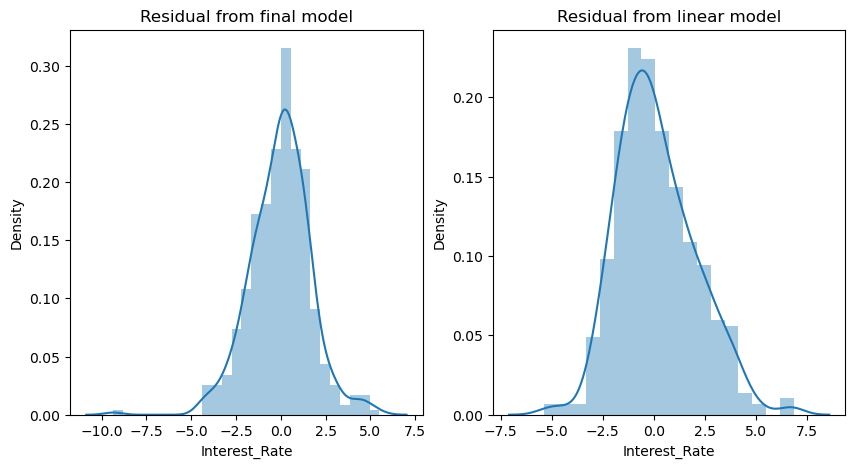

In [117]:
residual_poly_grid = y_pred_val-y_poly_validation

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(residual_poly_grid)
plt.title('Residual from final model')

plt.subplot(1,2,2)
sns.distplot(residual)
plt.title('Residual from linear model')

plt.tight_layout
plt.show()

* Residuals are now closer to zero(with more density) and the spread has also reduced, except for a very few outliers.

## Predicting Interest_Rates

In [118]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
data_poly_test = poly.fit_transform(test)

In [119]:
feature_names = poly.get_feature_names_out(input_features=features.columns)
data_poly_df2 = pd.DataFrame(data_poly_test, columns=feature_names)

In [120]:
data_poly_df2

1  Amount_Requested  Amount_Funded_By_Investors  Loan_Length  \
0    1.0            5000.0                      5000.0         60.0   
1    1.0           18000.0                     18000.0         60.0   
2    1.0            7200.0                      7200.0         60.0   
3    1.0            7200.0                      7200.0         36.0   
4    1.0           22000.0                     22000.0         60.0   
..   ...               ...                         ...          ...   
283  1.0           12000.0                     11975.0         60.0   
284  1.0            5000.0                      5000.0         36.0   
285  1.0            4375.0                      4375.0         36.0   
286  1.0           13600.0                     13600.0         60.0   
287  1.0            6000.0                      6000.0         36.0   

     Debt_To_Income_Ratio  Home_Ownership  Monthly_Income  FICO_Range  \
0                   12.59             3.0         4416.67       692.0   
1                    4.93             3.0         5258.50       712.0   
2                   25.16             2.0         3750.00       752.0   
3                   17.27             2.0         3416.67       792.0   
4                   18.28             2.0         6083.33       722.0   
..                    ...             ...             ...         ...   
283                 13.91             2.0         7083.33       707.0   
284                 17.22             1.0         4000.00       707.0   
285                  9.09             3.0         2916.67       672.0   
286                 12.85             3.0         5651.33       677.0   
287                  7.64             2.0         5184.75       677.0   

     Open_CREDIT_Lines  Revolving_CREDIT_Balance  ...  Employment_Length^2  \
0                 13.0                    7686.0  ...                 0.25   
1                  6.0                   11596.0  ...               225.00   
2                 13.0                    7283.0  ...                36.00   
3                 14.0                    4838.0  ...               225.00   
4                  9.0                   20181.0  ...                64.00   
..                 ...                       ...  ...                  ...   
283                7.0                    3923.0  ...                49.00   
284               10.0                    6023.0  ...               225.00   
285                9.0                    6944.0  ...                36.00   
286               13.0                   24383.0  ...               225.00   
287                8.0                   14422.0  ...                 4.00   

     Employment_Length Loan_Purpose_credit_card  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
283                                         0.0   
284                                         0.0   
285                                         6.0   
286                                        15.0   
287                                         0.0   

     Employment_Length Loan_Purpose_debt_consolidation  \
0                                                  0.0   
1                                                 15.0   
2                                                  6.0   
3                                                 15.0   
4                                                  8.0   
..                                                 ...   
283                                                0.0   
284                                               15.0   
285                                                0.0   
286                                                0.0   
287                                                2.0   

     Employment_Length Loan_Pu

In [121]:
grid_search.predict(data_poly_df2)

array([14.31624679, 16.29062968,  9.25873339,  4.91148742, 13.96481215,
       14.96063757,  9.40865618, 14.6296745 , 11.08233229,  9.06961241,
       10.22092788, 14.33202192, 13.68756745, 18.85632819, 10.0377352 ,
       15.47468916, 13.19942583, 14.86459088, 26.24810462, 18.25479742,
        9.7932855 , 15.76292411,  8.31512689,  9.29824845, 21.13000706,
       11.86783167, 15.47612077, 15.13896464, 16.29001713, 12.50478405,
       15.39811755, 13.71708245, 14.37807355, 19.09143951,  9.89258494,
       11.67425085, 15.36658753, 13.89071585, 10.89802215, 13.24684699,
       16.71149082, 16.6169962 , 14.13242958, 15.14828437, 16.3888955 ,
        9.63644592, 13.29246713, 21.08506748, 11.6951935 , 21.15718209,
       15.64741995, 14.131004  , 17.75950757, 16.75553627,  9.35327239,
       16.72488951, 14.12056971, 15.36932957,  7.43383183, 14.87693404,
        9.18497164, 11.52296118, 12.24035698, 15.10073533,  9.95286345,
       14.16488536, 18.935184  , 20.83018953, 21.12729279, 13.74

In [122]:
import pickle

In [123]:
with open('Linear_Model.pkl','wb') as f:
    pickle.dump(grid_search,f)

In [124]:
with open('Linear_Model.pkl','rb') as f:
    grid_search=pickle.load(f)

In [125]:
grid_search.predict(data_poly_df2)

array([14.31624679, 16.29062968,  9.25873339,  4.91148742, 13.96481215,
       14.96063757,  9.40865618, 14.6296745 , 11.08233229,  9.06961241,
       10.22092788, 14.33202192, 13.68756745, 18.85632819, 10.0377352 ,
       15.47468916, 13.19942583, 14.86459088, 26.24810462, 18.25479742,
        9.7932855 , 15.76292411,  8.31512689,  9.29824845, 21.13000706,
       11.86783167, 15.47612077, 15.13896464, 16.29001713, 12.50478405,
       15.39811755, 13.71708245, 14.37807355, 19.09143951,  9.89258494,
       11.67425085, 15.36658753, 13.89071585, 10.89802215, 13.24684699,
       16.71149082, 16.6169962 , 14.13242958, 15.14828437, 16.3888955 ,
        9.63644592, 13.29246713, 21.08506748, 11.6951935 , 21.15718209,
       15.64741995, 14.131004  , 17.75950757, 16.75553627,  9.35327239,
       16.72488951, 14.12056971, 15.36932957,  7.43383183, 14.87693404,
        9.18497164, 11.52296118, 12.24035698, 15.10073533,  9.95286345,
       14.16488536, 18.935184  , 20.83018953, 21.12729279, 13.74